# Финальный проект. Промышленность 

## Описание проекта и план работы

Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. Необходимо построить модель, которая предскажет температуру стали.

### Описание этапа обработки

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»).

### Описание данных

Данные состоят из файлов, полученных из разных источников:

- `data_arc_new.csv` — данные об электродах;
- `data_bulk_new.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time_new.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas_new.csv` — данные о продувке сплава газом;
- `data_temp_new.csv` — результаты измерения температуры;
- `data_wire_new.csv` — данные о проволочных материалах (объём);
- `data_wire_time_new.csv` — данные о проволочных материалах (время).

Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.

Данные также находятся в тренажёре, в папке `/datasets/`.

### Задачи

Необходимо построить прототип модели машинного обучения. Его разработка состоит из нескольких этапов:
1. Составить план работы. Исходное условие задачи заведомо неполное и содержит лишнюю информацию. Провести разведывательный анализ данных, чтобы понять, какие вопросы подготовить.
2. Уточнить задачу. Задать вопросы тимлиду, на вводном вебинаре.
3. Разработать модель. Отправить код на проверку тимлиду.
4. Подготовить отчёт. Отправить отчёт тимлиду, чтобы он проверил успешность выполнения задания.

### План работы

__Цель проекта__: построить модель, которая предсказывает значение температуры стали после обработки. Для дальнейшей оптимизации процесса обработки.

__Ориентировочный план работ__. Необходимо выполнить: 


1. `Исследовательский (разведочный) анализ данных`:
    - Загрузить все необходимые библиотеки;
    1. изучить все таблицы: info(), describe();
    2. построить графики: распределения, гистограммы;
    3. найти и исправить проблемы с выбросами и аномалиями, если такие имеются;
    4. обработать пропуски и дубликаты, если такие имеются;
    
    
2. `Предобработка данных`:
    1. выделить целевой признак;
    2. объединить или агрегировать данные в одну таблицу для построения модели;
    3. выявить ненужные признаки;
    4. создание дополнительных признаков, если такое возможно, например, из даты-времени, промежутки времени на нагрев;
    5. проверить корреляцию признаков;
    6. выполнить кодирование и масштабирование признаков, если потребуется;
    7. разделить данные на обучающую и тестовую выборки;
    
    
3. `Обучение моделей`:
    1. Определить целевую метрику;
    2. Линейная регрессия, Ridge и Lasso;
    3. Случайный лес;
    4. Градиентный бустинг: GradientBoostingRegressor, LGBM и Catboost;
    5. Для всех моделей использовать подбор гиперпараметров, например с помощью GridSearchCV или RandomizedSearchCV.
    6. Использовать пайплайн;
    7. Сделать сводку по обученным моделям по метрике и времени обучения, для выбора наилучшей;
    8. Проверить на адекватность модели.
    
    
4. `Тестирование`: протестировать выбранную модель на тестовой выборке, оценить результаты.
    - (опционально): Если результаты не устраивают, провести дополнительный анализ, предобработку данных, обучение моделей.
    
    
5. `Выводы` и `подготовка отчета` для заказчика.

__Список уточняющих вопросов__:

- Правильно ли я поняла, что данные из 7 датасетов надо все объединить в один?
- Целевой признак - это Температура из `data_temp_new`? Но там в датасете несколько измерений температуры на партию, их разное количество, где-то 1-2 измерения, где-то 15-16. Что из этого брать? Последнюю по времени? 
- Какую метрику выбрать - MAE, RMSE, R2?
- Есть выброс, очень сильный, в реактивной мощности - удалить его?
- 	bulk_1	bulk_2	bulk_3	bulk_4 - это разные сыпучие материалы? Какие-то могут подсыпаться в текущую партию, какие-то нет? Там много пропусков, есть даже один столбец, где ___одно___ непропущенное значение. Что с ними делать? Можно их объединить? Просуммировать? Или использовать все, но заменить пропуски на нули?  
- Таблицы с временем, `data_bulk_time_new` и `data_wire_time_new` - время подачи материалов, они вообще нужны? Мы же не задачу временных рядов решаем? 
- Есть пропуски в признаке `Температура` таблицы  `data_temp_new`: нужно или удалить их, или восстановить как-то? Интересно, можно ли взять среднее по партии? Хотя если это целевой признак, то может быть это неправильно?
- Значения температуры варьируются от 1191 до 1705. Причем среднее значение и медиана = 1590, а так же 25% процентиль - 1580 и 75% - 1599. То есть размах небольшой, всего около 20 градусов. Может быть на 100 градусов выше и на 389 градусов ниже? Можно ли считать понижение на почти 400 градусов - выбросом или аномалией? 
- Судя по первым, самым ранним показаниям, начальная температура как раз в районе средней.. Значит ли это что нагрев просто для того, чтобы в ковше не остывала сталь, пока идет добавление всяких материалов?

## Исследовательский анализ данных (EDA)

В конце Jupyter Notebook нужно написать:
- Список уточняющих вопросов.
- Примерный план решения задачи. Пропишите 3–5 основных шагов, каждый поясните не более двумя предложениями.
- Цель проекта.

In [ ]:
#!pip install matplotlib==3.3.1
#!pip install shap

In [2]:
# импортируем библиотеки
import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator
from datetime import datetime, timedelta
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler 

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import shap

import warnings
warnings.filterwarnings('ignore')

random_state = 240423

In [5]:
# загрузим датасет
try:
    data_arc_new = pd.read_csv('/datasets/data_arc_new.csv')
    data_bulk_new = pd.read_csv('/datasets/data_bulk_new.csv')
    data_bulk_time_new = pd.read_csv('/datasets/data_bulk_time_new.csv')
    data_gas_new = pd.read_csv('/datasets/data_gas_new.csv')
    data_temp_new = pd.read_csv('/datasets/data_temp_new.csv')
    data_wire_new = pd.read_csv('/datasets/data_wire_new.csv')
    data_wire_time_new = pd.read_csv('/datasets/data_wire_time_new.csv')
except:
    data_arc_new = pd.read_csv('datasets/data_arc_new.csv')
    data_bulk_new = pd.read_csv('datasets/data_bulk_new.csv')
    data_bulk_time_new = pd.read_csv('datasets/data_bulk_time_new.csv')
    data_gas_new = pd.read_csv('datasets/data_gas_new.csv')
    data_temp_new = pd.read_csv('datasets/data_temp_new.csv')
    data_wire_new = pd.read_csv('datasets/data_wire_new.csv')
    data_wire_time_new = pd.read_csv('datasets/data_wire_time_new.csv')

### `data_arc_new` — данные об электродах

   - `key` содержит номер партии.
   - В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.
   - 14876 объектов. 
   - 5 признаков: `key` (номер партии), `Начало нагрева дугой`, `Конец нагрева дугой`, `Активная мощность`, `Реактивная мощность`
   - Пропусков нет.
   - `Начало нагрева дугой`, `Конец нагрева дугой` - даты

In [6]:
data_arc_new.tail(15)

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
14861,3239,2019-09-06 14:33:44,2019-09-06 14:35:55,0.535115,0.364837
14862,3239,2019-09-06 14:42:58,2019-09-06 14:47:52,0.663877,0.570882
14863,3239,2019-09-06 14:57:08,2019-09-06 14:58:01,0.520180,0.376394
14864,3239,2019-09-06 14:59:35,2019-09-06 15:01:26,0.894547,0.613122
14865,3239,2019-09-06 15:03:45,2019-09-06 15:05:50,0.549963,0.346631
14866,3240,2019-09-06 15:25:31,2019-09-06 15:27:32,0.669469,0.497374
14867,3240,2019-09-06 15:31:02,2019-09-06 15:33:35,0.566284,0.380893
14868,3240,2019-09-06 15:58:45,2019-09-06 16:01:15,0.382519,0.232164
14869,3240,2019-09-06 16:02:41,2019-09-06 16:07:15,0.496953,0.416185
14870,3240,2019-09-06 16:21:54,2019-09-06 16:24:15,1.202454,0.846936


In [7]:
data_arc_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


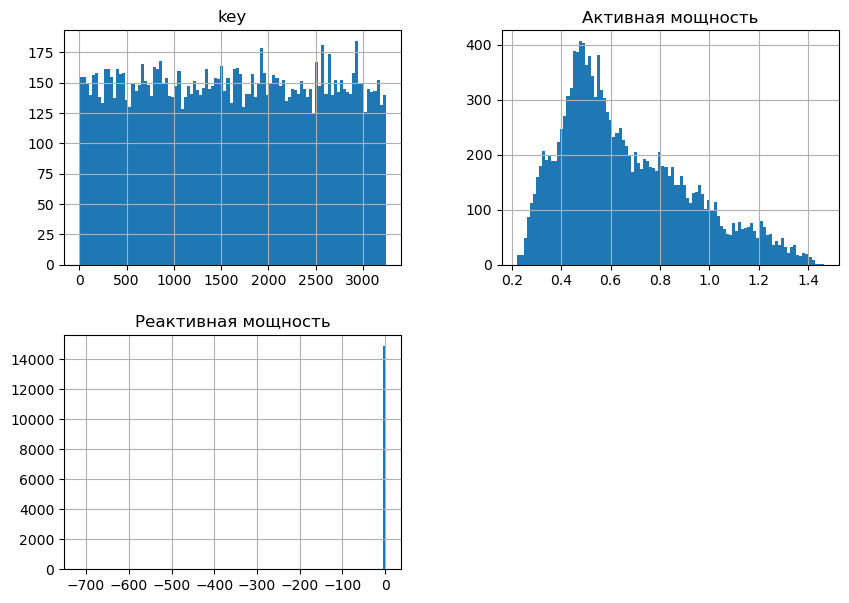

In [8]:
data_arc_new.hist(bins=100, figsize=(10,7));

In [9]:
data_arc_new.describe()

,key,Активная мощность,Реактивная мощность
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.662752,0.438986
std,934.571502,0.258885,5.873485
min,1.000000,0.223120,-715.479924
25%,806.000000,0.467115,0.337175
50%,1617.000000,0.599587,0.441639
75%,2429.000000,0.830070,0.608201
max,3241.000000,1.463773,1.270284


In [10]:
data_arc_new = data_arc_new.rename(columns={"Начало нагрева дугой": "start_arc_heating", 
                             "Конец нагрева дугой": "end_arc_heating",
                             "Активная мощность": "active_power",
                             "Реактивная мощность": "reactive_power"})

In [11]:
data_arc_new['start_arc_heating'] = pd.to_datetime(data_arc_new['start_arc_heating'])
data_arc_new['end_arc_heating'] = pd.to_datetime(data_arc_new['end_arc_heating'])

In [12]:
print(f"Мин. время-дата начала добаления: {data_arc_new['start_arc_heating'].min()}")
print(f"Макс. время-дата начала добаления: {data_arc_new['start_arc_heating'].max()}")
print(f"Мин. время-дата окончания добаления: {data_arc_new['end_arc_heating'].min()}")
print(f"Макс. время-дата окончания добаления: {data_arc_new['end_arc_heating'].max()}")

Мин. время-дата начала добаления: 2019-05-03 11:02:14
Макс. время-дата начала добаления: 2019-09-06 17:24:54
Мин. время-дата окончания добаления: 2019-05-03 11:06:02
Макс. время-дата окончания добаления: 2019-09-06 17:26:15


Данные с 3 мая 2019 года по 6 сентября 2019 года: около 4 месяцев.

In [13]:
data_arc_new.sample()

,key,start_arc_heating,end_arc_heating,active_power,reactive_power
9321,2020,2019-07-24 06:46:45,2019-07-24 06:49:50,1.177198,0.790985


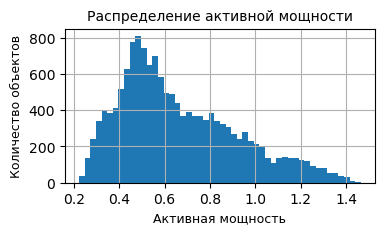

In [14]:
data_arc_new['active_power'].hist(bins=50, figsize=(4,2));
plt.title('Распределение активной мощности', size=10);
plt.xlabel('Активная мощность', size=9);
plt.ylabel('Количество объектов', size=9);

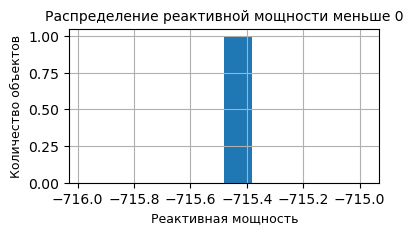

In [15]:
data_arc_new.loc[data_arc_new['reactive_power'] < 0, 'reactive_power'].hist(figsize=(4,2));
plt.title('Распределение реактивной мощности меньше 0', size=10);
plt.xlabel('Реактивная мощность', size=9);
plt.ylabel('Количество объектов', size=9);

- Есть одно значение в столбце 'Реактивная мощность', выпадающее из всех значений: -715.4. Все остальные значения лежат в дисапазоне от 0.15 до 1.27 примерно.

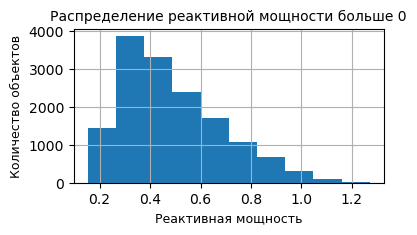

In [16]:
data_arc_new.loc[data_arc_new['reactive_power'] > 0, 'reactive_power'].hist(figsize=(4,2));
plt.title('Распределение реактивной мощности больше 0', size=10);
plt.xlabel('Реактивная мощность', size=9);
plt.ylabel('Количество объектов', size=9);

In [17]:
print(data_arc_new.loc[data_arc_new['reactive_power'] > -715, 'reactive_power'].min())
print(data_arc_new.loc[data_arc_new['reactive_power'] > -715, 'reactive_power'].max())

0.153777
1.270284


In [18]:
data_arc_new['key'].value_counts().head(10)

2108    16
1513    15
1689    15
2567    14
46      13
322     13
1829    12
44      12
2916    12
2917    11
Name: key, dtype: int64

In [19]:
data_arc_new.loc[data_arc_new['key'] == 2108]

,key,start_arc_heating,end_arc_heating,active_power,reactive_power
9734,2108,2019-07-27 10:41:13,2019-07-27 10:43:28,0.682359,0.536962
9735,2108,2019-07-27 11:07:24,2019-07-27 11:08:51,0.786992,0.582873
9736,2108,2019-07-27 11:13:37,2019-07-27 11:14:32,0.525551,0.329251
9737,2108,2019-07-27 11:15:45,2019-07-27 11:16:45,1.175194,0.789164
9738,2108,2019-07-27 11:19:26,2019-07-27 11:21:24,0.671852,0.508570
9739,2108,2019-07-27 11:23:12,2019-07-27 11:26:07,0.325151,0.217883
9740,2108,2019-07-27 13:39:32,2019-07-27 13:43:14,0.412624,0.278039
9741,2108,2019-07-27 13:45:19,2019-07-27 13:48:19,0.798390,0.616971
9742,2108,2019-07-27 13:49:36,2019-07-27 13:57:40,0.327366,0.239850
9743,2108,2019-07-27 14:01:23,2019-07-27 14:05:24,1.233412,0.855522


In [20]:
data_arc_new['key'].value_counts().tail()

112     1
2472    1
2025    1
3059    1
1615    1
Name: key, dtype: int64

Этапов по нагреву может быть от 1 до 16. 

### `data_bulk_new` - данные о подаче сыпучих материалов (объём)

- 16 столбцов: номер партии и 15 этапов по подаче сыпучих материалов (bulk_1, bulk_2, bulk_3 и т.д. )
- Есть пропуски. 
- Как я понимаю, bulk_1, bulk_2, bulk_3 - это разные материалы. Какие-то могут подсыпаться в текущую партию, какие-то нет.
- Можно ли обьединить их или просуммировать - для создания нового признака.

In [21]:
data_bulk_new.head(5)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


In [22]:
data_bulk_new.tail()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
3124,3237,NaN,NaN,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.0,NaN,130.0,206.0
3125,3238,NaN,NaN,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.0,NaN,108.0,106.0
3126,3239,NaN,NaN,NaN,NaN,NaN,114.0,NaN,NaN,NaN,NaN,NaN,158.0,NaN,270.0,88.0
3127,3240,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0,54.0
3128,3241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.0,52.0


In [23]:
data_bulk_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


In [24]:
data_bulk_new.describe()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,3129.000000,252.000000,22.000000,1298.000000,1014.000000,77.000000,576.000000,25.000000,1.0,19.000000,176.000000,177.000000,2450.000000,18.000000,2806.000000,2248.000000
mean,1624.383509,39.242063,253.045455,113.879045,104.394477,107.025974,118.925347,305.600000,49.0,76.315789,83.284091,76.819209,260.471020,181.111111,170.284747,160.513345
std,933.337642,18.277654,21.180578,75.483494,48.184126,81.790646,72.057776,191.022904,NaN,21.720581,26.060347,59.655365,120.649269,46.088009,65.868652,51.765319
min,1.000000,10.000000,228.000000,6.000000,12.000000,11.000000,17.000000,47.000000,49.0,63.000000,24.000000,8.000000,53.000000,151.000000,16.000000,1.000000
25%,816.000000,27.000000,242.000000,58.000000,72.000000,70.000000,69.750000,155.000000,49.0,66.000000,64.000000,25.000000,204.000000,153.250000,119.000000,105.000000
50%,1622.000000,31.000000,251.500000,97.500000,102.000000,86.000000,100.000000,298.000000,49.0,68.000000,86.500000,64.000000,208.000000,155.500000,151.000000,160.000000
75%,2431.000000,46.000000,257.750000,152.000000,133.000000,132.000000,157.000000,406.000000,49.0,70.500000,102.000000,106.000000,316.000000,203.500000,205.750000,205.000000
max,3241.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.0,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000


Отрицательных значений нет.

Значения материалов варьируются от 1 до максимального 1849 (bulk 12). Единицы измерений мы не знаем.

In [25]:
for i in range(1, 16):
    data_bulk_new = data_bulk_new.rename(columns={f"Bulk {i}": f"bulk_{i}"})

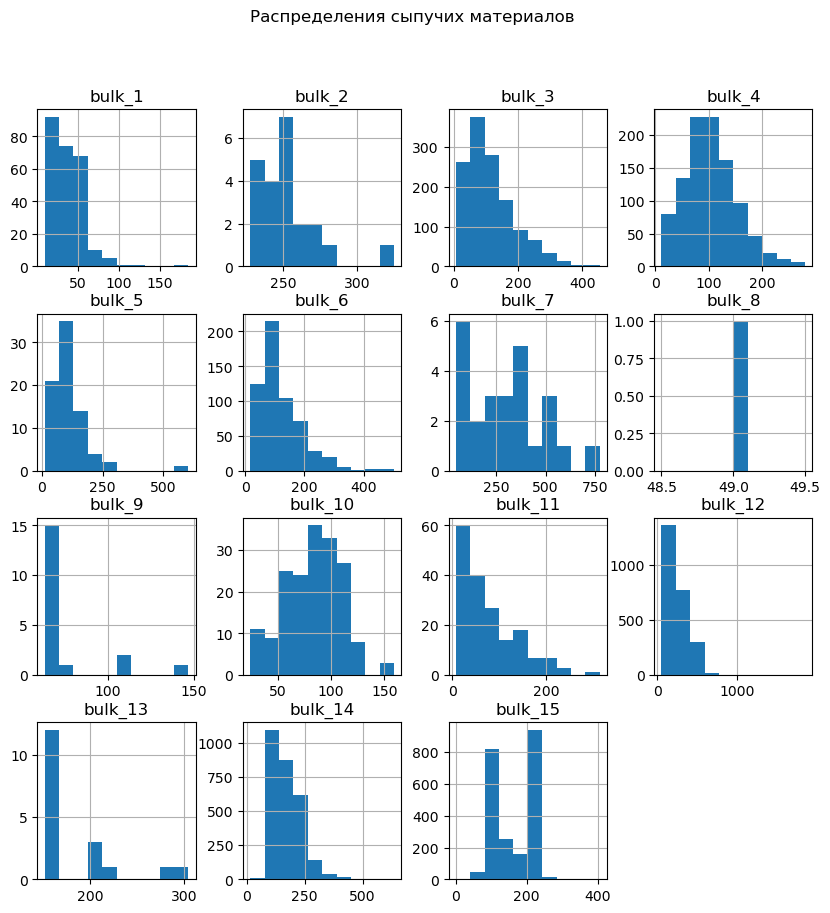

In [26]:
data_bulk_new.loc[:, 'bulk_1':'bulk_15'].hist(figsize=(10,10));
plt.suptitle('Распределения сыпучих материалов');

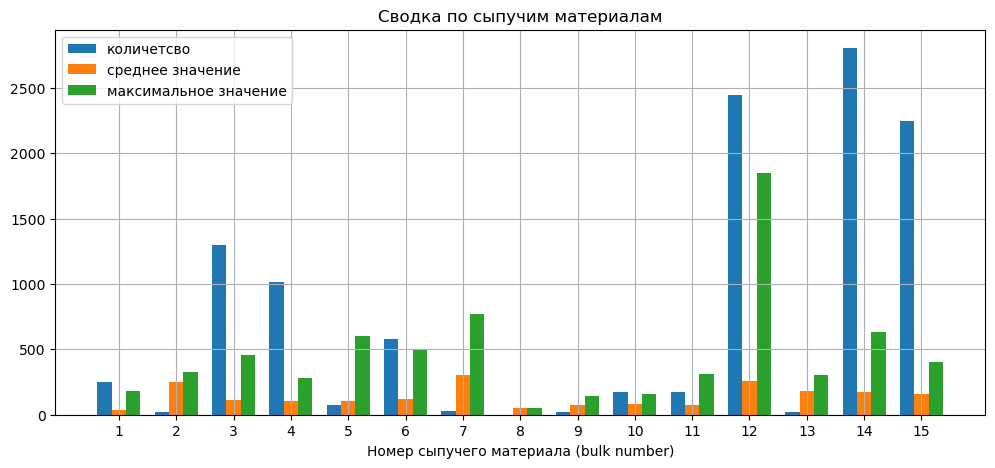

In [27]:
count = []
avg = []; mins = []; maxs = []
labels = range(1, 16)
for i in labels:
    temp = data_bulk_new[f"bulk_{i}"]
    count.append(temp.count()) 
    avg.append(temp.mean())
    mins.append(temp.min())
    maxs.append(temp.max())

barWidth = 0.25
r1 = np.arange(len(labels))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
#r4 = [x + barWidth for x in r3]
plt.figure(figsize=(12,5))
plt.bar(r1, count, width=barWidth, label='количетсво')
plt.bar(r2, avg, width=barWidth, label='среднее значение')
#plt.bar(r3, mins, width=barWidth, label='минимальное значение')
plt.bar(r3, maxs, width=barWidth, label='максимальное значение')
plt.grid()
plt.xticks([r + barWidth for r in range(len(labels))], labels)
plt.title('Сводка по сыпучим материалам')
plt.xlabel('Номер сыпучего материала (bulk number)')
plt.legend()
plt.show()

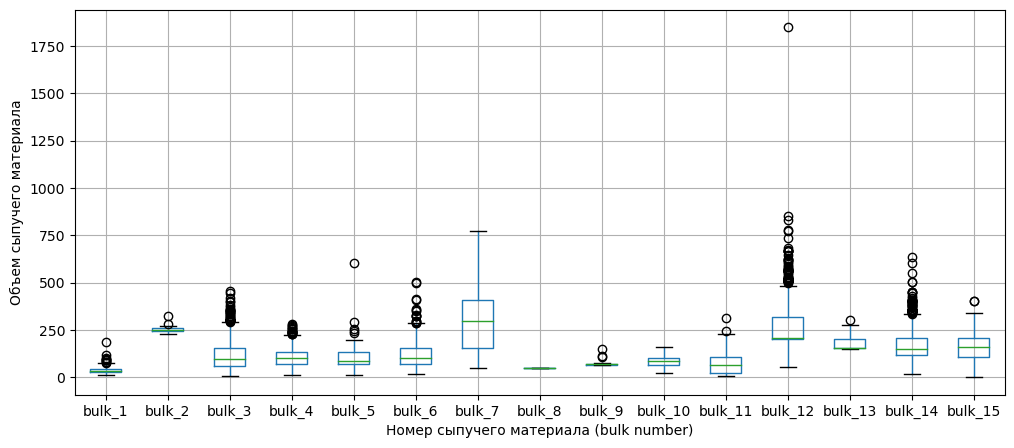

In [36]:
copy_bulk = data_bulk_new.drop('key', axis=1)
copy_bulk.boxplot(figsize=(12,5));
plt.xlabel('Номер сыпучего материала (bulk number)');
plt.ylabel('Объем сыпучего материала');

In [33]:
data_bulk_new.loc[data_bulk_new['key'] == 2108]

,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
2036,2108,63.0,242.0,NaN,98.0,94.0,NaN,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
data_bulk_time_new.loc[data_bulk_time_new['key'] == 2108]

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
2036,2108,2019-07-27 16:34:15,2019-07-27 16:24:45,NaN,2019-07-27 15:33:23,2019-07-27 15:29:14,NaN,2019-07-27 15:19:35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### `data_bulk_time_new` - данные о подаче сыпучих материалов (время)

- эта таблица повторяет предыдущую по количеству столбцов, только в них данные - не количество, а время. 
- Эти данные скорее всего для обучения моделей не нужны.

In [35]:
data_bulk_time_new.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:28:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:24:31,NaN,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaN,NaN,NaN,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:53:30,NaN,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaN,NaN,NaN,2019-05-03 12:32:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:27:13,NaN,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaN,NaN,NaN,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:58:00,NaN,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,2019-05-03 13:34:12,2019-05-03 13:30:47


In [37]:
data_bulk_time_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


In [38]:
for i in range(1, 16):
    data_bulk_time_new = data_bulk_time_new.rename(columns={f"Bulk {i}": f"bulk_{i}"})

In [39]:
for i in range(1, 16):
    data_bulk_time_new[f"bulk_{i}"] = pd.to_datetime(data_bulk_time_new[f"bulk_{i}"])

In [40]:
print("Мин. время-дата добавления:", min([data_bulk_time_new[f"bulk_{i}"].min() for i in range(1,16)]))
print("Макс. время-дата добавления:", max([data_bulk_time_new[f"bulk_{i}"].max() for i in range(1,16)]))
# [data_bulk_time_new[f"bulk_{i}"].min() for i in range(1,16)]

Мин. время-дата добавления: 2019-05-03 11:10:43
Макс. время-дата добавления: 2019-09-06 17:26:33


Даты добаления сыпучих материалов в том же временном диапазоне, что и даты нагревания.

### `data_gas_new` - данные о продувке сплава газом

- всего 2 столбца: номер партии `key` и числовое значение, "Газ 1" - объем поданного газа. 
- количество объектов почти равно количеству партий. То есть одна партия продувалась один раз. 
- НО: если посмотреть на хвост, то последний номер партии и номер строки не совпадают (номер партии должен быть на 1 больше, т.к. счет идет с 1, а номера строк с 0). Но номер партии обогнал на 2, значит, какие-то 2 партии потерялись.
- Пропуски отстуствуют.

In [41]:
data_gas_new.head()

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


In [42]:
data_gas_new.tail()

,key,Газ 1
3234,3237,5.543905
3235,3238,6.745669
3236,3239,16.023518
3237,3240,11.863103
3238,3241,12.680959


In [43]:
data_gas_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


In [44]:
data_gas_new.describe()

,key,Газ 1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


In [45]:
data_gas_new = data_gas_new.rename(columns={'Газ 1' : 'gas'})

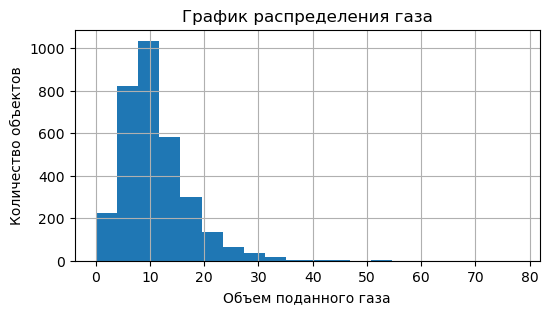

In [46]:
data_gas_new['gas'].hist(bins=20, figsize=(6,3));
plt.title('График распределения газа');
plt.xlabel('Объем поданного газа');
plt.ylabel('Количество объектов');

### `data_temp_new` - результаты измерения температуры

- По идее, содержит целевой признак.
- 3 столбца: номер партии `key`, `Время замера`, `Температура`.
- На каждую партию может быть несколько измерений.
- Есть пропуски в признаке `Температура`: возможно их нужно удалить, или как-то восстановить. 
- Значения температуры варьируются от 1191 до 1705. Причем среднее значение и медиана = 1590, а так же 25% процентиль - 1580 и 75% - 1599. То есть размах небольшой, всего около 20 градусов. 
- Может ли температура быть на 100 градусов выше и на 389 градусов ниже? Можно ли считать понижение на почти 400 градусов - выбросом или аномалией? 
- Судя по первым, самым ранним показаниям, начальная температура как раз в районе средней. Это может значить, что нагрев просто для того, чтобы в ковше не остывала сталь, пока идет добавление всяких материалов.
- По диаграме размаха видно, что значения температуры распределены нормально вокруг среднего значения, но есть несколько выбивающихся значений около значения 1200 - их буквально 5 штук, и принадлежат они разным партиям.. Все остальные значения - больше 1500.

In [47]:
data_temp_new.head(10)

,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0
5,1,2019-05-03 11:30:38,1613.0
6,2,2019-05-03 11:34:04,1581.0
7,2,2019-05-03 11:38:40,1577.0
8,2,2019-05-03 11:46:09,1589.0
9,2,2019-05-03 11:49:38,1604.0


In [48]:
data_temp_new.tail(10)

,key,Время замера,Температура
18082,3240,2019-09-06 15:58:35,NaN
18083,3240,2019-09-06 16:02:31,NaN
18084,3240,2019-09-06 16:21:44,NaN
18085,3240,2019-09-06 16:35:26,NaN
18086,3241,2019-09-06 16:48:55,1586.0
18087,3241,2019-09-06 16:55:01,NaN
18088,3241,2019-09-06 17:06:38,NaN
18089,3241,2019-09-06 17:21:48,NaN
18090,3241,2019-09-06 17:24:44,NaN
18091,3241,2019-09-06 17:30:05,NaN


In [49]:
data_temp_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   Время замера  18092 non-null  object 
 2   Температура   14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB


In [50]:
data_temp_new.describe()

,key,Температура
count,18092.000000,14665.000000
mean,1616.460977,1590.722741
std,934.641385,20.394381
min,1.000000,1191.000000
25%,807.750000,1580.000000
50%,1618.000000,1590.000000
75%,2429.000000,1599.000000
max,3241.000000,1705.000000


In [51]:
data_temp_new = data_temp_new.rename(columns={'Время замера': 'measurement_time', 'Температура' : 'temperature'})

In [52]:
data_temp_new['temperature'].quantile(0.25) -  data_temp_new['temperature'].min()

389.0

In [53]:
data_temp_new['measurement_time'] = pd.to_datetime(data_temp_new['measurement_time'])

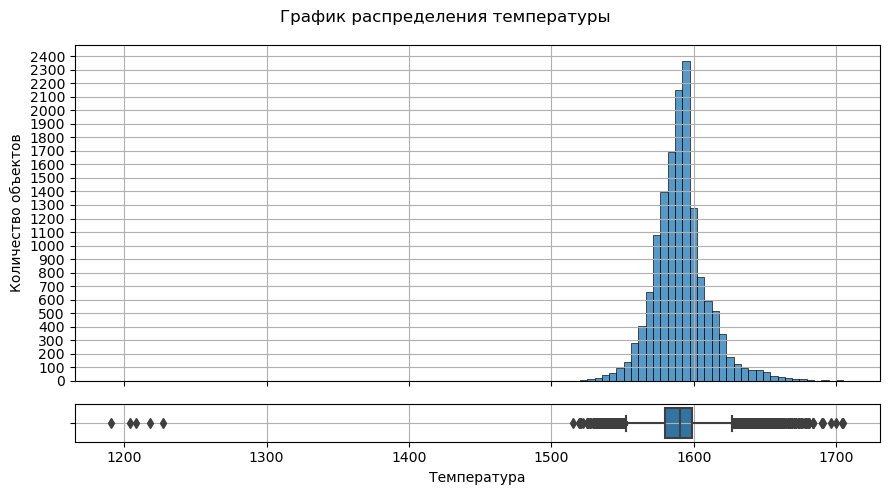

In [55]:
fig, (axhist, axbox) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.9, 0.1)}, figsize=(9, 5))
fig.suptitle('График распределения температуры')
sns.histplot(data=data_temp_new, x='temperature', bins=100, ax=axhist)
sns.boxplot(data=data_temp_new, x='temperature', ax=axbox)
axhist.set_ylabel('Количество объектов')
axbox.set_xlabel('Температура')
axhist.set_xlabel('')
axhist.yaxis.set_major_locator(MultipleLocator(100))
axhist.grid(); axbox.grid()
fig.tight_layout()

In [56]:
data_temp_new.sort_values(by='temperature').head(10)

,key,measurement_time,temperature
4883,867,2019-06-06 08:03:39,1191.0
14283,2561,2019-08-12 18:49:29,1204.0
6784,1214,2019-06-18 08:01:03,1208.0
9050,1619,2019-07-03 02:34:41,1218.0
11495,2052,2019-07-25 08:49:15,1227.0
11499,2052,2019-07-25 09:20:11,1515.0
9359,1671,2019-07-04 17:02:03,1519.0
5117,908,2019-06-07 14:32:37,1520.0
2881,512,2019-05-23 02:49:33,1520.0
4889,867,2019-06-06 08:43:02,1521.0


Судя по всему, значения температуры распределены нормально вокруг среднего значения, но есть несколько выбивающихся значений около значения 1200 - их буквально 5 штук, и принадлежат они разным партиям. Все остальные значения - больше 1500.

In [57]:
print(f"Мин. время-дата измерения температуры: {data_temp_new['measurement_time'].min()}")
print(f"Макс. время-дата измерения температуры: {data_temp_new['measurement_time'].max()}")

Мин. время-дата измерения температуры: 2019-05-03 11:02:04
Макс. время-дата измерения температуры: 2019-09-06 17:30:05


Даты измерения температуры в том же временном диапазоне, что и даты нагревания.  С 3 мая 2019 года по 6 сентября 2019 года

In [58]:
data_temp_new.loc[data_temp_new['key'] == 2108].count()

key                 17
measurement_time    17
temperature         17
dtype: int64

Объект, партия - 2108, которая имеет 16 нагревов, так же имеет 17 измерений температуры.

### `data_wire_new` -  данные о проволочных материалах (объём)

- 10 столбцов: номер партии и 9 этапов по подаче проволочных материалов (Wire 1, Wire 2 и т.д. )
- Есть пропуски. 
- Как я понимаю, Wire 1, Wire 2 - это разные материалы. Какие-то могут подсыпаться в текущую партию, какие-то нет.


In [59]:
data_wire_new.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
data_wire_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


In [61]:
data_wire_new.describe()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,3081.000000,3055.000000,1079.000000,63.000000,14.000000,1.000,73.000000,11.000000,19.000000,29.000000
mean,1623.426485,100.895853,50.577323,189.482681,57.442842,15.132,48.016974,10.039007,53.625193,34.155752
std,932.996726,42.012518,39.320216,99.513444,28.824667,NaN,33.919845,8.610584,16.881728,19.931616
min,1.000000,1.918800,0.030160,0.144144,24.148801,15.132,0.034320,0.234208,45.076721,4.622800
25%,823.000000,72.115684,20.193680,95.135044,40.807002,15.132,25.053600,6.762756,46.094879,22.058401
50%,1619.000000,100.158234,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
75%,2434.000000,126.060483,70.227558,276.252014,76.124619,15.132,64.212723,11.886057,48.089603,43.862003
max,3241.000000,330.314424,282.780152,385.008668,113.231044,15.132,180.454575,32.847674,102.762401,90.053604


Отрицательных значений нет.

Значения материалов варьируются от 0.03 до максимального 385 (`wire_3`). Единицы измерений мы не знаем.

Так же есть `wire_5`, где все значения пропущены, кроме всего одного. Т.е. использовалась в одной партии.

In [62]:
for i in range(1, 10):
    data_wire_new = data_wire_new.rename(columns={f"Wire {i}": f"wire_{i}"})

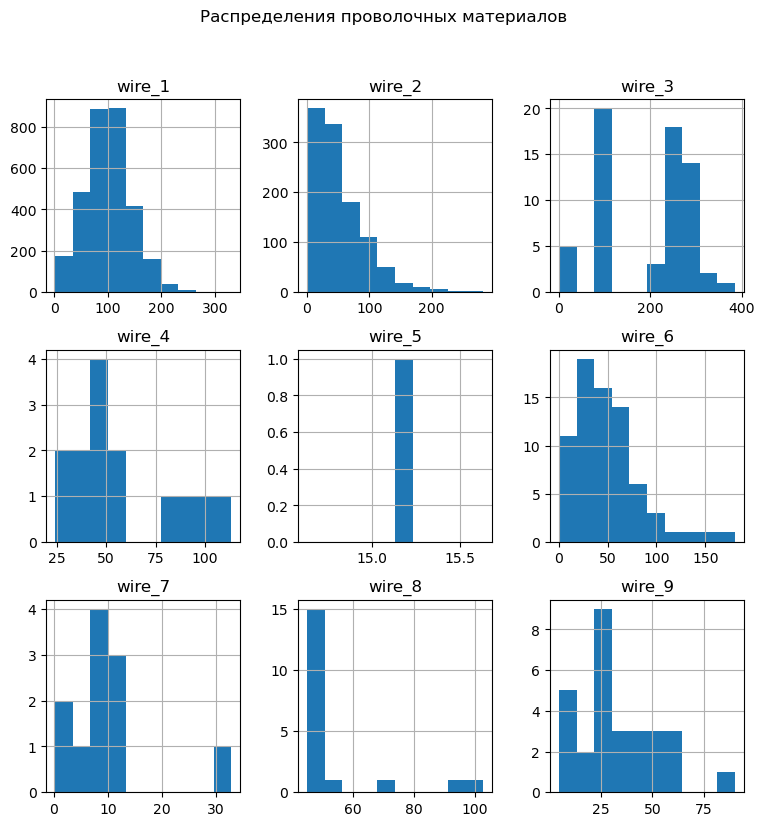

In [63]:
data_wire_new.loc[:, 'wire_1':'wire_9'].hist(figsize=(9,9));
plt.suptitle('Распределения проволочных материалов', size=12);

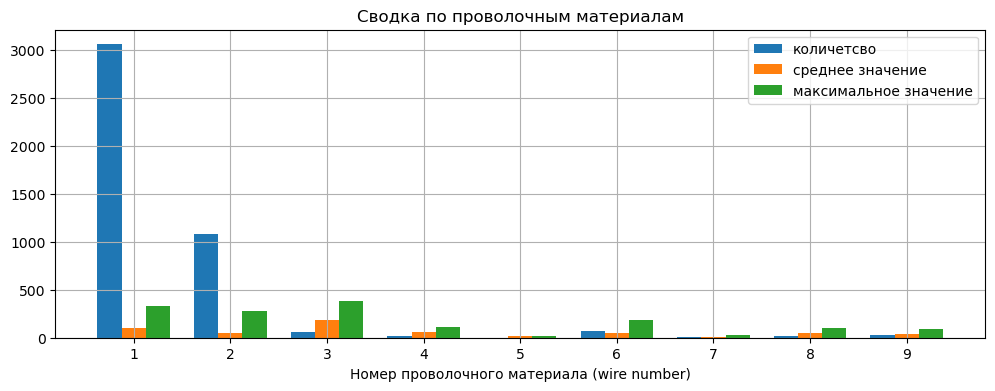

In [56]:
count = []
avg = []; mins = []; maxs = []
labels = range(1, 10)
for i in labels:
    temp = data_wire_new[f"wire_{i}"]
    count.append(temp.count()) 
    avg.append(temp.mean())
    mins.append(temp.min())
    maxs.append(temp.max())

barWidth = 0.25
r1 = np.arange(len(labels))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
#r4 = [x + barWidth for x in r3]
plt.figure(figsize=(12,4))
plt.bar(r1, count, width=barWidth, label='количетсво')
plt.bar(r2, avg, width=barWidth, label='среднее значение')
#plt.bar(r3, mins, width=barWidth, label='минимальное значение')
plt.bar(r3, maxs, width=barWidth, label='максимальное значение')
plt.grid()
plt.xticks([r + barWidth for r in range(len(labels))], labels)
plt.title('Сводка по проволочным материалам')
plt.xlabel('Номер проволочного материала (wire number)')
plt.legend()
plt.show()

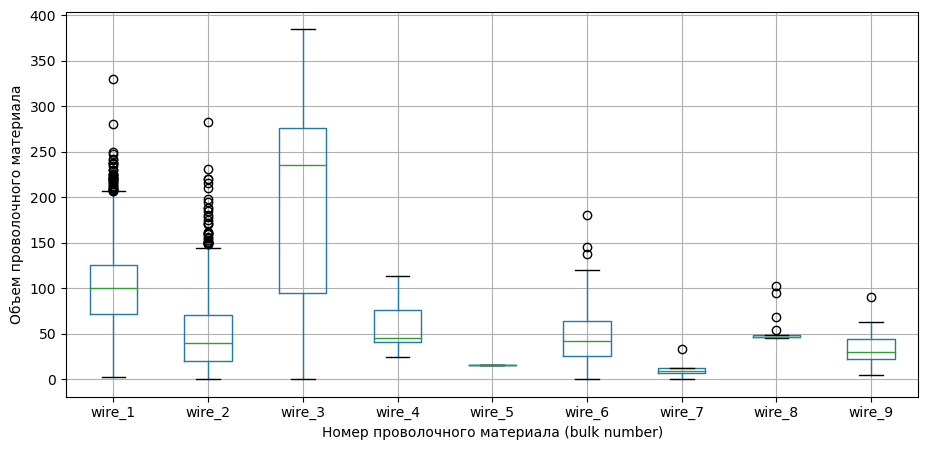

In [66]:
copy_wire = data_wire_new.drop('key', axis=1)
copy_wire.boxplot(figsize=(11,5));
plt.xlabel('Номер проволочного материала (bulk number)');
plt.ylabel('Объем проволочного материала');

In [82]:
data_wire_new.loc[data_wire_new['key'] == 2108]

,key,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
2010,2108,11.05104,NaN,93.213127,92.570401,NaN,63.045845,1.053936,NaN,NaN


In [83]:
wire_temp = data_wire_new.drop('key', axis=1)

In [84]:
wire_temp[wire_temp['wire_1'].isna()]

,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
98,NaN,NaN,88.648567,43.065361,NaN,54.122643,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN,64.212723,NaN,NaN,NaN
101,NaN,NaN,93.068977,NaN,NaN,26.975523,NaN,NaN,NaN
102,NaN,NaN,94.990898,33.182243,NaN,60.025684,NaN,NaN,NaN
103,NaN,NaN,93.117027,NaN,NaN,43.174561,NaN,NaN,NaN
116,NaN,NaN,NaN,NaN,NaN,28.108082,NaN,NaN,NaN
118,NaN,NaN,NaN,NaN,NaN,26.151842,NaN,NaN,NaN
299,NaN,188.228550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
472,NaN,23.193039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
496,NaN,22.107281,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### `data_wire_time_new` - данные о проволочных материалах (время)

- Эта таблица повторяет предыдущую по количеству столбцов, только в них данные - не количество, а время. 
- Эти данные скорее всего для обучения моделей не нужны.

In [85]:
data_wire_time_new.head()

,key,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
0,1,2019-05-03 11:06:19,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,2,2019-05-03 11:36:50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,3,2019-05-03 12:11:46,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,4,2019-05-03 12:43:22,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [86]:
data_wire_time_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   key     3081 non-null   int64         
 1   wire_1  3055 non-null   datetime64[ns]
 2   wire_2  1079 non-null   datetime64[ns]
 3   wire_3  63 non-null     datetime64[ns]
 4   wire_4  14 non-null     datetime64[ns]
 5   wire_5  1 non-null      datetime64[ns]
 6   wire_6  73 non-null     datetime64[ns]
 7   wire_7  11 non-null     datetime64[ns]
 8   wire_8  19 non-null     datetime64[ns]
 9   wire_9  29 non-null     datetime64[ns]
dtypes: datetime64[ns](9), int64(1)
memory usage: 240.8 KB


In [87]:
for i in range(1, 10):
    data_wire_time_new = data_wire_time_new.rename(columns={f"Wire {i}": f"wire_{i}"})
    data_wire_time_new[f"wire_{i}"] = pd.to_datetime(data_wire_time_new[f"wire_{i}"])

In [88]:
data_wire_time_new.loc[:, 'wire_1':'wire_9'].describe(include='all')

,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
count,3055,1079,63,14,1,73,11,19,29
unique,3055,1079,63,14,1,73,11,19,29
top,2019-05-03 11:06:19,2019-05-03 13:15:34,2019-05-04 04:34:27,2019-05-07 15:19:17,2019-08-13 06:14:30,2019-05-07 14:46:05,2019-07-27 05:49:05,2019-05-14 11:29:24,2019-05-04 17:21:27
freq,1,1,1,1,1,1,1,1,1
first,2019-05-03 11:06:19,2019-05-03 13:15:34,2019-05-04 04:34:27,2019-05-07 15:19:17,2019-08-13 06:14:30,2019-05-07 14:46:05,2019-07-27 05:49:05,2019-05-14 11:29:24,2019-05-04 17:21:27
last,2019-09-06 17:10:06,2019-09-06 07:35:40,2019-09-02 07:14:44,2019-08-13 03:16:45,2019-08-13 06:14:30,2019-08-18 19:10:56,2019-08-13 10:25:22,2019-08-16 08:56:23,2019-09-03 12:55:23


In [89]:
print("Мин. время-дата добавления:", min([data_wire_time_new[f"wire_{i}"].min() for i in range(1,10)]))
print("Макс. время-дата добавления:", max([data_wire_time_new[f"wire_{i}"].max() for i in range(1,10)]))

Мин. время-дата добавления: 2019-05-03 11:06:19
Макс. время-дата добавления: 2019-09-06 17:10:06


Даты также в диапазоне, как и в других датасетах.

### Рабочий процесс на примере одной партии

Номер партии: 44, дата: 2019-05-04 23:26:23


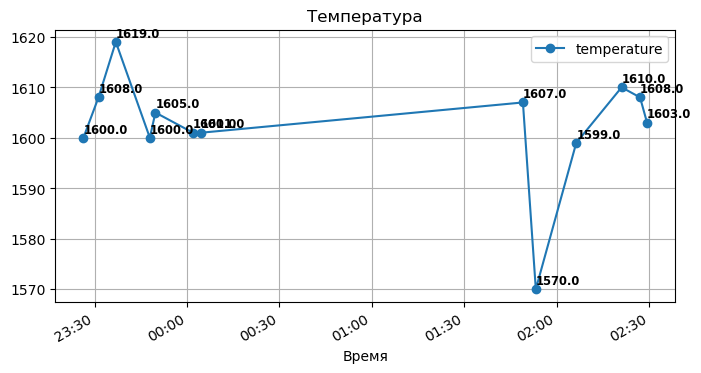

In [90]:
def gathering(key=1, plot=False, data_arc_new=data_arc_new, data_temp_new=data_temp_new, data_bulk_time_new=data_bulk_time_new, data_bulk_new=data_bulk_new, data_wire_time_new=data_wire_time_new, data_wire_new=data_wire_new):
    # данные с нагрева
    data_arc_key = data_arc_new[data_arc_new['key'] == key]
    data_arc_key = data_arc_key.drop('key', axis=1)
    data_arc_key.columns = ['timestamp', 'time_end', 'active_power', 'reactive_power']
    data_arc_key = data_arc_key.set_index('timestamp')
    #display(data_arc_key)
    # построим график мощностей
    #data_arc_key.plot(y=['active_power', 'reactive_power'],  marker='o', grid=True, figsize=(5,3));
    # данные о температуре
    data_temp_key = data_temp_new[data_temp_new['key'] == key]
    data_temp_key = data_temp_key.drop('key', axis=1)
    data_temp_key.columns = ['timestamp', 'temperature']
    data_temp_key = data_temp_key.set_index('timestamp')
    data_temp_key.index = pd.to_datetime(data_temp_key.index, unit='s')
    #display(data_temp_key)

    print(f'Номер партии: {key}, дата: {data_temp_key.index[0]}')
    if plot:
        # построим график температуры
        xformatter = mdates.DateFormatter('%H:%M')
        data_temp_key.plot(marker='o', grid=True, figsize=(8,4)); plt.title('Температура'); 
        plt.gcf().axes[0].xaxis.set_major_formatter(xformatter);
        plt.xlabel('Время');
        for line in range(0,data_temp_key.shape[0]):
             plt.text(data_temp_key.index[line], data_temp_key.temperature[line]+1, s = data_temp_key.temperature[line], horizontalalignment='left', size='small', color='black', weight='semibold')


    # данные о сыпучих материалах и времени их засыпки
    bulk_time_key = data_bulk_time_new[data_bulk_time_new['key'] == key].T.reset_index().dropna()
    bulk_time_key.columns = ['name', 'timestamp']
    data_bulk_key = data_bulk_new[data_bulk_new['key'] == key].T.reset_index().dropna().join(bulk_time_key)
    data_bulk_key = data_bulk_key.drop(['name'], axis=1)
    data_bulk_key = data_bulk_key.drop(0, axis=0)
    data_bulk_key = data_bulk_key.set_index('timestamp')
    data_bulk_key.columns = ['num_bulk', 'mass_bulk']
    #display(data_bulk_key)
    # построим график сыпучих материалов
    #data_bulk_key.plot(marker='o', grid=True, figsize=(5,3));

    # данные о проволочных материалах и времени их засыпки
    wire_time = data_wire_time_new[data_wire_time_new['key'] == key].T.reset_index().dropna()
    wire_time.columns = ['name', 'timestamp']
    wire_key = data_wire_new[data_wire_new['key'] == key].T.reset_index().dropna().join(wire_time)
    wire_key = wire_key.drop(['index'], axis=1)
    wire_key = wire_key.drop(0, axis=0)
    wire_key = wire_key.set_index('timestamp')
    wire_key.columns = ['mass_wire', 'num_wire']
    #display(wire_key)
    # построим график проволочных материалов
    #wire_key.plot(marker='o', grid=True, figsize=(5,3));

    # объединить все
    key_process = data_arc_key.join(data_temp_key, how='outer').join(data_bulk_key, how='outer').join(wire_key, how='outer')
    #display(key_process)
    return key, key_process

key, result = gathering(44, plot=True)

In [91]:
# Заведение в одну таблицу со всеми метками
def make_table(key, key_process):
    time_end = key_process['time_end'].reset_index().dropna()
    time_end['label_end'] = 'end_heating'
    time_end = time_end.drop('timestamp', axis=1)
    time_end.columns = ['timestamp', 'label_end']
    time_end = time_end.set_index('timestamp')
    key_process_dop = key_process.join(time_end, how='outer')
    key_process_dop = key_process_dop.rename(columns={'time_end':'label_start_heating'})
    key_process_dop.loc[~(key_process_dop['label_start_heating'].isna()), 'label_start_heating'] = 'start_heating, power'
    key_process_dop['label'] = key_process_dop['label_start_heating']
    key_process_dop.loc[~(key_process_dop['label_end'].isna()), 'label'] = 'end_heating'
    key_process_dop.loc[~(key_process_dop['num_wire'].isna()), 'label'] = 'add_wire_1'
    key_process_dop.loc[~(key_process_dop['num_bulk'].isna()), 'label'] ="add_" + key_process_dop.loc[~(key_process_dop['num_bulk'].isna()), 'num_bulk']
    key_process_dop.loc[~(key_process_dop['temperature'].isna()), 'label'] = 'measure_TEMP'
    key_process_dop = key_process_dop.drop(['label_start_heating', 'label_end', 'num_wire', 'num_bulk'], axis=1)
    key_process_dop['value'] = key_process_dop['temperature']
    key_process_dop.loc[~(key_process_dop['active_power'].isna()), 'value'] = key_process_dop.loc[~(key_process_dop['active_power'].isna()), 'active_power']
    key_process_dop.loc[~(key_process_dop['mass_bulk'].isna()), 'value'] = key_process_dop.loc[~(key_process_dop['mass_bulk'].isna()), 'mass_bulk']
    key_process_dop.loc[~(key_process_dop['mass_wire'].isna()), 'value'] = key_process_dop.loc[~(key_process_dop['mass_wire'].isna()), 'mass_wire']
    key_process_dop.loc[key_process_dop['label'] == 'end_heating', 'value'] = '-'
    print(f'Как выглядит процесс на примере партии {key}:')
    display(key_process_dop[['label', 'value']])
    
make_table(key, result)    

Как выглядит процесс на примере партии 44:


,label,value
timestamp,,
2019-05-04 23:26:23,measure_TEMP,1600.0
2019-05-04 23:26:33,"start_heating, power",1.018485
2019-05-04 23:28:59,end_heating,-
2019-05-04 23:31:17,measure_TEMP,1608.0
2019-05-04 23:31:27,"start_heating, power",0.42061
2019-05-04 23:34:49,end_heating,-
2019-05-04 23:36:54,measure_TEMP,1619.0
2019-05-04 23:37:04,"start_heating, power",0.565153
2019-05-04 23:41:19,end_heating,-


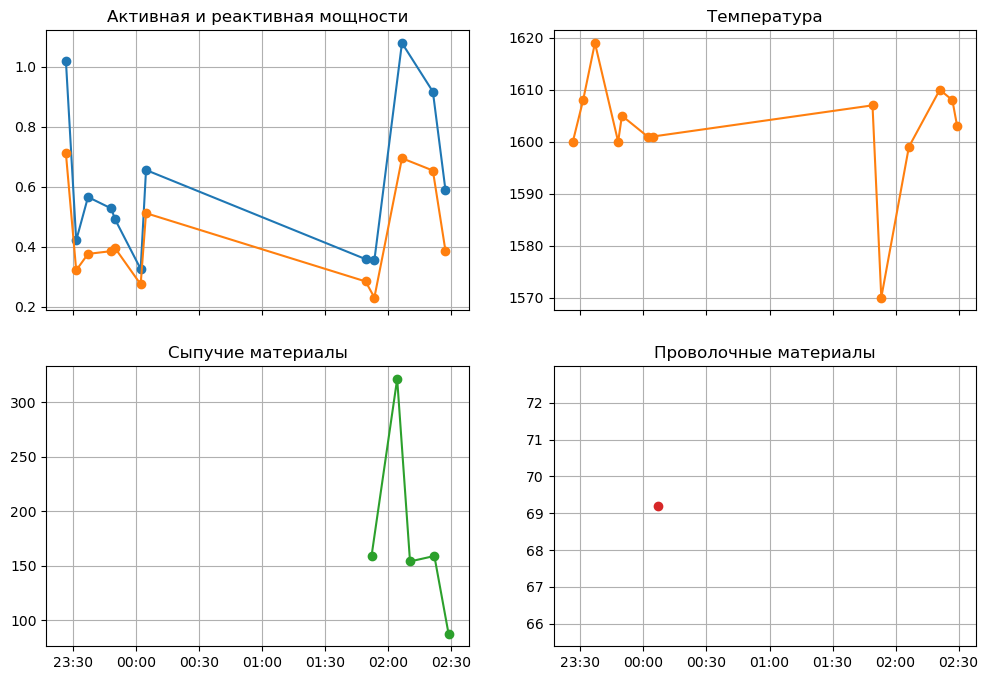

In [92]:
def plotting_separate_graphs(result):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,8), sharex=True)
    ax1.plot(result[['active_power', 'reactive_power']].dropna(),  marker='o'); ax1.set_title('Активная и реактивная мощности')
    ax2.plot(result['temperature'].dropna(), 'tab:orange', marker='o'); ax2.set_title('Температура')
    ax3.plot(result['mass_bulk'].dropna(), 'tab:green', marker='o'); ax3.set_title('Сыпучие материалы')
    ax4.plot(result['mass_wire'].dropna(), 'tab:red', marker='o'); ax4.set_title('Проволочные материалы')
    ax1.grid(); ax2.grid(); ax3.grid(); ax4.grid()
    xformatter = mdates.DateFormatter('%H:%M')
    plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
    plt.gcf().axes[1].xaxis.set_major_formatter(xformatter)
    ax3.xaxis.set_major_formatter(xformatter); ax4.xaxis.set_major_formatter(xformatter)
    plt.show()
    
plotting_separate_graphs(result)    

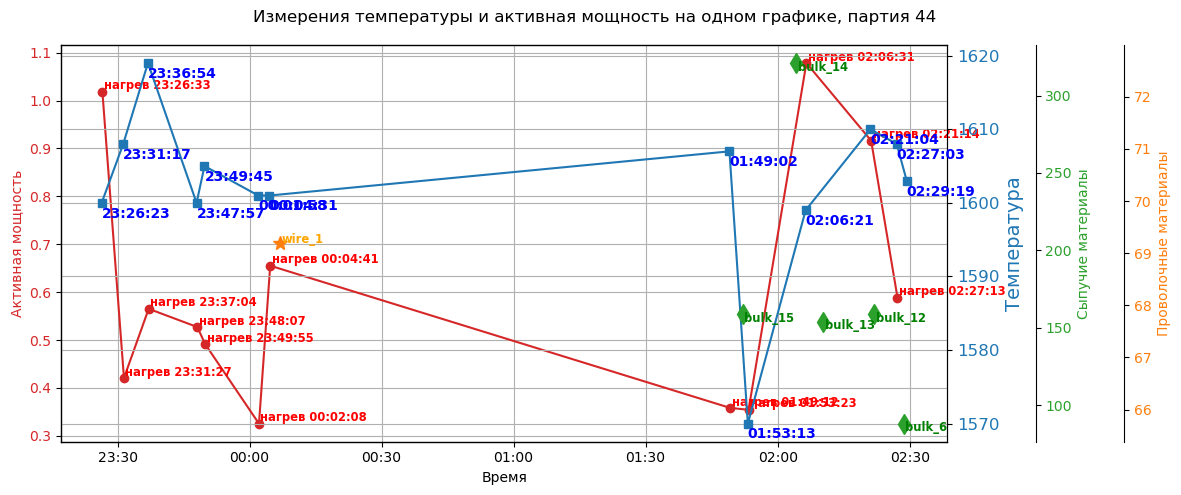

In [93]:
def plotting_all_on_one(key, result):
    # попробуем уместить все на одном графике
    data1 = result['active_power'].dropna()
    data2 = result['temperature'].dropna()
    data3 = result[['mass_bulk', 'num_bulk']].dropna()
    data4 = result[['mass_wire', 'num_wire']].dropna()
    xformatter = mdates.DateFormatter('%H:%M')
    fig, ax1 = plt.subplots(figsize=(12,5))
    fig.suptitle(f'Измерения температуры и активная мощность на одном графике, партия {key}')

    color = 'tab:red'
    ax1.set_xlabel('Время')
    ax1.set_ylabel('Активная мощность', color=color)
    ax1.plot(data1, color=color, marker='o')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.grid()
    ax2 = ax1.twinx()

    color = 'tab:blue'
    ax2.set_ylabel('Температура', color=color, size=14)  
    ax2.plot(data2, color=color, marker='s')
    ax2.tick_params(axis='y', labelcolor=color, labelsize='large')
    ax2.grid()
    plt.gcf().axes[0].xaxis.set_major_formatter(xformatter);


    ax3 = ax1.twinx()
    color = 'tab:green'
    ax3.set_ylabel('Сыпучие материалы', color=color)  
    ax3.plot(data3.mass_bulk, color=color, linestyle='none', marker='d', markersize=10)
    ax3.tick_params(axis='y', labelcolor=color)
    ax3.spines['right'].set_position(('axes', 1.1))

    ax4 = ax1.twinx()
    color = 'tab:orange'
    ax4.set_ylabel('Проволочные материалы', color=color)  
    ax4.plot(data4.mass_wire, color=color, linestyle='none', marker='*', markersize=10)
    ax4.tick_params(axis='y', labelcolor=color)
    ax4.spines['right'].set_position(('axes', 1.2))

    for line in range(0,data1.shape[0]):
         ax1.text(data1.index[line]+ timedelta(seconds=20), data1[line]+0.005, s = 'нагрев ' + str(data1.index[line].time()), horizontalalignment='left', size='small', color='red', weight='semibold')
    for line in range(0,data2.shape[0]):
         ax2.text(data2.index[line], data2[line]-2, s = data2.index[line].time(), horizontalalignment='left', size='medium', color='blue', weight='semibold')
    for line in range(0,data3.shape[0]):
         ax3.text(data3.index[line]+ timedelta(seconds=20), data3.mass_bulk[line]-5, s = data3.num_bulk[line], horizontalalignment='left', size='small', color='green', weight='semibold')        
    for line in range(0,data4.shape[0]):
         ax4.text(data4.index[line]+ timedelta(seconds=20), data4.mass_wire[line], s = data4.num_wire[line], horizontalalignment='left', size='small', color='orange', weight='semibold')        

    fig.tight_layout() 
    plt.show()

plotting_all_on_one(key, result)    

Номер партии: 1, дата: 2019-05-03 11:02:04


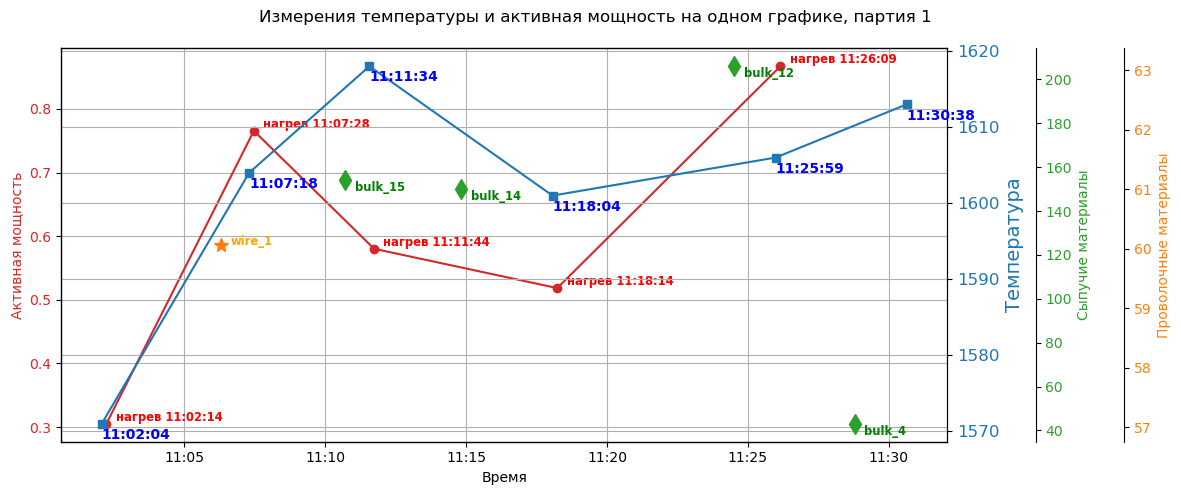

In [94]:
# можно вызвать функции с разным номером партии, чтобы посмотреть графики проходившего процесса.
key, result = gathering(1)
plotting_all_on_one(key, result)    

Номер партии: 2108, дата: 2019-07-27 10:41:03


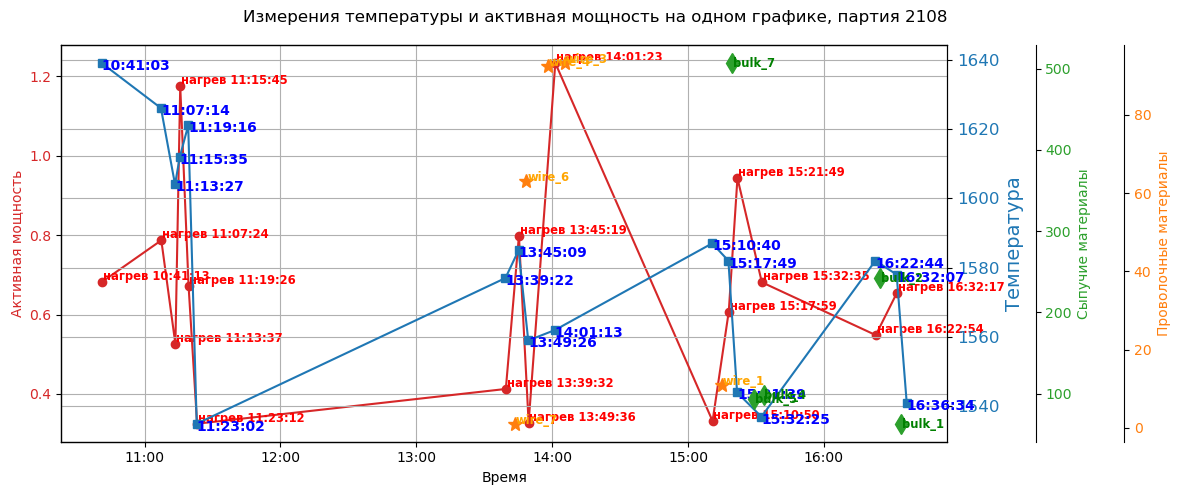

In [95]:
key, result = gathering(2108)
plotting_all_on_one(key, result)    

__ВЫВОД__ 

Можно заметить по первой партии, что процесс происходит следующим образом:

1. есть начальное значение температуры,
2. происходит нагрев, 
3. добавляется материал (сыпучий или проволочный), 
4. происходит измерение температуры.
5. Пункты 1-4 могут повториться 1-15 раз. 

Однако, по другим партиям можно заметить (например, по 44й):
- что сначала происходит несколько циклов только нагрева и измерения температуры, без добавления материалов. 
- промежутки бездействия могут быть в несколько часов, на протяжении которых сталь может остывать.

Например, в самой длинной партии (2108) сначала прошло 6 циклов нагрева и измерений без добавления материалов, и прошло 3 часа с момента начала, когда стали делать добавления материалов.

## Предобработка данных

Информация от тимлида: `целевой признак - это последняя температура`, метрика MAE < 6,8

### Обработка пропусков и аномалий

In [96]:
# удалим объект с отрицательной реактивной мощностью из всех таблиц
anomaly = data_arc_new.loc[data_arc_new['reactive_power'] < 0]
display(anomaly)
anomaly_key = list(anomaly.key.values)
print(anomaly_key)
# удаление anomaly_key
def deletion_list_of_keys(list_of_keys):
    global data_arc_new, data_bulk_new, data_bulk_time_new, data_gas_new, data_temp_new, data_wire_new, data_wire_time_new
    data_arc_new = data_arc_new[~(data_arc_new['key'].isin(list_of_keys))]
    data_bulk_new = data_bulk_new[~(data_bulk_new['key'].isin(list_of_keys))]
    data_bulk_time_new = data_bulk_time_new[~(data_bulk_time_new['key'].isin(list_of_keys))]
    data_gas_new = data_gas_new[~(data_gas_new['key'].isin(list_of_keys))]
    data_temp_new = data_temp_new[~(data_temp_new['key'].isin(list_of_keys))]
    data_wire_new = data_wire_new[~(data_wire_new['key'].isin(list_of_keys))]
    data_wire_time_new = data_wire_time_new[~(data_wire_time_new['key'].isin(list_of_keys))]
    return 'удалено'
deletion_list_of_keys(anomaly_key)

,key,start_arc_heating,end_arc_heating,active_power,reactive_power
9780,2116,2019-07-28 02:22:08,2019-07-28 02:23:57,0.705344,-715.479924


[2116]


'удалено'

In [97]:
# удалим объекты с аномально низкой температурой
anomaly2 = data_temp_new[data_temp_new['temperature'] < 1400]
display(anomaly2)
anomaly2_keys = list(anomaly2.key.values)
print(anomaly2_keys)
# удаление anomaly2_keys
deletion_list_of_keys(anomaly2_keys)

,key,measurement_time,temperature
4883,867,2019-06-06 08:03:39,1191.0
6784,1214,2019-06-18 08:01:03,1208.0
9050,1619,2019-07-03 02:34:41,1218.0
11495,2052,2019-07-25 08:49:15,1227.0
14283,2561,2019-08-12 18:49:29,1204.0


[867, 1214, 1619, 2052, 2561]


'удалено'

In [98]:
# удалим объекты с пропусками в температуре - из них нельзя вытащить целевой признак
data_temp_new.isna().sum()

key                    0
measurement_time       0
temperature         3422
dtype: int64

In [99]:
keys_missed_temp = list(data_temp_new.loc[data_temp_new['temperature'].isna(), 'key'].unique())
print(f"Всего объектов с пропусками значений температуры: {len(keys_missed_temp)}")
# удаление
deletion_list_of_keys(keys_missed_temp)

Всего объектов с пропусками значений температуры: 738


'удалено'

In [100]:
temp = data_temp_new['key'].value_counts().reset_index().rename(columns={'index':'key', 'key':'num'})
keys_one_temperature = list(temp.loc[temp.num == 1, 'key'])
print('Ключи, где всего один замер температуры: ', keys_one_temperature)
deletion_list_of_keys(keys_one_temperature)

Ключи, где всего один замер температуры:  [195, 279]


'удалено'

In [101]:
data_bulk_new.shape

(2402, 16)

In [102]:
# количество явных дубликатов
tables = [data_arc_new, data_bulk_new, data_bulk_time_new, data_gas_new, data_temp_new, data_wire_new, data_wire_time_new]
for table in tables:
    print(table.duplicated().sum())


0
0
0
0
0
0
0


### Материалы

In [103]:
# заменим пропуски на нули в материалах
data_bulk_new = data_bulk_new.fillna(0)
data_wire_new = data_wire_new.fillna(0)

In [104]:
# посчитаем количество ненулевых значений по каждому объекту, количество добавок на партию:
def count_bulks(t):
    count = 0
    for i in range(1, 16):
        if t[f"bulk_{i}"] != 0:
            count += 1
    return count
data_bulk_new['num_bulks'] = data_bulk_new.apply(count_bulks, axis=1)
data_bulk_new.sample()

,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15,num_bulks
621,651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88.0,0.0,393.0,0.0,213.0,188.0,4


In [105]:
def count_wires(t):
    count = 0
    for i in range(1, 10):
        if t[f"wire_{i}"] != 0:
            count += 1
    return count
data_wire_new['num_wires'] = data_wire_new.apply(count_wires, axis=1)
data_wire_new.sample()

,key,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9,num_wires
1888,1982,45.208797,88.127517,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


### Выделение целевого признака

In [115]:
print(data_temp_new['measurement_time'].is_monotonic)
# даты в датасете с температурами непрерывно возрастают, 
# поэтому можно взять последнюю запись с температурой по каждому номеру партии
#target = data_temp_new.groupby('key').agg({'temperature':'last'})
#target.head()

True


In [106]:
# возмем по каждому ключу запись с наибольшей датой:
t = data_temp_new.groupby('key')['measurement_time', 'temperature'].apply(lambda x: x[x['measurement_time'] == x['measurement_time'].max()])
t.head()

,,measurement_time,temperature
key,,,
1,5,2019-05-03 11:30:38,1613.0
2,10,2019-05-03 11:55:09,1602.0
3,16,2019-05-03 12:35:57,1599.0
4,21,2019-05-03 12:59:47,1625.0
5,26,2019-05-03 13:36:39,1602.0


In [108]:
target = t.reset_index()[['key', 'temperature']].set_index('key')
target.head()

,temperature
key,
1,1613.0
2,1602.0
3,1599.0
4,1625.0
5,1602.0


### Начальная температура

Выделим также начальную температуру, с которой начался процесс - это может использоваться как признак для обучения.


In [109]:
initial_temp = data_temp_new.groupby('key').agg(initital_temp=('temperature', 'first'))
initial_temp.head()

,initital_temp
key,
1,1571.0
2,1581.0
3,1596.0
4,1601.0
5,1576.0


### Мощности, преобразование и новые признаки

In [116]:
# добавим время КАЖДОГО нагрева в каждой партии в секундах
data_arc_new['heating_time_sec'] = (data_arc_new['end_arc_heating'] - data_arc_new['start_arc_heating']).dt.total_seconds()
data_arc_new.head()

,key,start_arc_heating,end_arc_heating,active_power,reactive_power,heating_time_sec
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253,228.0
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438,185.0
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460,172.0
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979,365.0
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691,148.0


In [117]:
# агрегируем данные по номеру партии key 
data_arc_grouped = data_arc_new.groupby('key').agg(number_heatings=('active_power', 'count'),
                                                   active_power_avg=('active_power', 'mean'),                                                   
                                                   reactive_power_avg=('reactive_power', 'mean'),
                                                   heating_time_sec_avg=('heating_time_sec', 'mean'),
                                                   start_time=('start_arc_heating', 'min'),
                                                   end_time=('end_arc_heating', 'max'))
data_arc_grouped['total_time'] = (data_arc_grouped['end_time'] - data_arc_grouped['start_time']).dt.total_seconds()
data_arc_grouped = data_arc_grouped.drop(['start_time', 'end_time'], axis=1)
data_arc_grouped.head()

,number_heatings,active_power_avg,reactive_power_avg,heating_time_sec_avg,total_time
key,,,,,
1,5,0.607346,0.428564,219.60,1583.0
2,4,0.534852,0.363339,202.75,1144.0
3,5,0.812728,0.587491,131.00,1525.0
4,4,0.676622,0.514248,185.25,1093.0
5,4,0.563238,0.421998,217.25,1362.0


Таблица `data_arc_grouped` содержит:
- `number_heatings` - количество нагревов в партии,
- `active_power_avg` - среднее значение _активной_ мощности нагрева в партии,
- `reactive_power_avg` - среднее значение _реактивной_ мощности нагрева в партии,
- `heating_time_sec_avg` - среднее время _одного_ нагрева в партии,
- `total_time` - общее время с начала первого нагрева до конца последнего нагрева.

In [118]:
# перевернем ("транспонируем") таблицу и возьмем отдельно все активные мощности нагрева по аналогии с bulk
data_all_active_powers = []
for k in list(data_arc_new['key'].unique()):
    data_arc_key = data_arc_new[data_arc_new['key'] == k]
    obj = [k] + data_arc_key['active_power'].values.tolist()
    data_all_active_powers.append(obj)
data_all_active_powers = pd.DataFrame(data_all_active_powers, columns=['key'] + [f"heat_{i}" for i in range(1,17)])
data_all_active_powers = data_all_active_powers.set_index('key')
data_all_active_powers.head()

,heat_1,heat_2,heat_3,heat_4,heat_5,heat_6,heat_7,heat_8,heat_9,heat_10,heat_11,heat_12,heat_13,heat_14,heat_15,heat_16
key,,,,,,,,,,,,,,,,
1,0.305130,0.765658,0.580313,0.518496,0.867133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.381124,0.261665,0.710297,0.786322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.101678,0.542675,0.774632,1.222963,0.421693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.642946,0.310693,0.887855,0.864995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.324563,0.573810,0.461620,0.892957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
# заменим пропуски на нули, т.к. нагрева не было
data_all_active_powers = data_all_active_powers.fillna(0)

Таблица `data_all_active_powers` содержит информацию по ВСЕМ нагревам (значения активной мощности) в каждой партии. 

Наибольшее количество нагревов было - 16.

Если n-ного нагрева в партии не было, то значение в таблице равно 0, т.к. активная мощность, была посути, ноль.

### Объединение таблиц

In [120]:
data_gas_new = data_gas_new.set_index('key')
data_bulk_new = data_bulk_new.set_index('key')
data_wire_new = data_wire_new.set_index('key')

In [121]:
data_features = initial_temp.join(data_arc_grouped, how='inner').join(data_gas_new, how='inner').join(data_bulk_new, how='inner').join(data_wire_new, how='inner').join(target, how='inner')
data_features.head()

,initital_temp,number_heatings,active_power_avg,reactive_power_avg,heating_time_sec_avg,total_time,gas,bulk_1,bulk_2,bulk_3,...,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9,num_wires,temperature
key,,,,,,,,,,,,,,,,,,,,,
1,1571.0,5,0.607346,0.428564,219.60,1583.0,29.749986,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1613.0
2,1581.0,4,0.534852,0.363339,202.75,1144.0,12.555561,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1602.0
3,1596.0,5,0.812728,0.587491,131.00,1525.0,28.554793,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1599.0
4,1601.0,4,0.676622,0.514248,185.25,1093.0,18.841219,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1625.0
5,1576.0,4,0.563238,0.421998,217.25,1362.0,5.413692,0.0,0.0,0.0,...,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1602.0


In [122]:
data_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2324 entries, 1 to 2499
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   initital_temp         2324 non-null   float64
 1   number_heatings       2324 non-null   int64  
 2   active_power_avg      2324 non-null   float64
 3   reactive_power_avg    2324 non-null   float64
 4   heating_time_sec_avg  2324 non-null   float64
 5   total_time            2324 non-null   float64
 6   gas                   2324 non-null   float64
 7   bulk_1                2324 non-null   float64
 8   bulk_2                2324 non-null   float64
 9   bulk_3                2324 non-null   float64
 10  bulk_4                2324 non-null   float64
 11  bulk_5                2324 non-null   float64
 12  bulk_6                2324 non-null   float64
 13  bulk_7                2324 non-null   float64
 14  bulk_8                2324 non-null   float64
 15  bulk_9               

In [123]:
data_features_more = data_features.join(data_all_active_powers, how='inner')
data_features_more.head(2).T                  

key,1,2
initital_temp,1571.000000,1581.000000
number_heatings,5.000000,4.000000
active_power_avg,0.607346,0.534852
reactive_power_avg,0.428564,0.363339
heating_time_sec_avg,219.600000,202.750000
total_time,1583.000000,1144.000000
gas,29.749986,12.555561
bulk_1,0.000000,0.000000
bulk_2,0.000000,0.000000
bulk_3,0.000000,0.000000


Если проверить работу моделей МО на таблице с большим количеством признаков `data_features_more` (с мощностями), то результат будет хуже. Т.к. Больше столбцов коррелируют.

1. Линейная регрессия (простая) показала себя хуже на аж на 3 целых! :
    - `data_features_more` + Lin REG = MAE $9.501$
    - `data_features`  + Lin REG = __MAE $6.2617$__


2. Lasso:
    - `data_features_more` + Lasso = MAE $6.25966$
    - `data_features`  + Lasso = __MAE $6.2268$__


3. Ridge:
    - `data_features_more` + Ridge = MAE $6.2757$
    - `data_features`  + Ridge = __MAE $6.2373$__


4. Light GBM:
    - `data_features_more` MAE = 6.3582. Гиперпараметры: `learning_rate`: 0.1, `max_depth`: 5, `min_child_samples`: 10, `min_child_weight`: 0.0001, `n_estimators`: 300, `num_leaves`: 5;

    - `data_features` __MAE = 6.1963__. Гиперпараметры: `learning_rate`: 0.1, `max_depth`: 2, `min_child_samples`: 10, `min_child_weight`: 0.0001, `n_estimators`: 400, `num_leaves`: 5}


5. Random Forest:
    - `data_features_more` MAE = 6.7936. Гиперпараметры: `max_depth` None: , `min_samples_leaf`: 2, `min_samples_split`: 5, `n_estimators`: 500;

    - `data_features` __MAE = 6.71509__. Гиперпараметры:  `max_depth`: 30, `min_samples_leaf`: 3, `min_samples_split`: 3, `n_estimators`: 500.

Все подобранные модели показывают себя хуже, линейная регресия - сильно хуже, сказывается корреляция. Модели с бустингом и случайный лес - на уровне, но на десятые доли все равно хуже.

Вывод: берем датасет `data_features` без значений мощностей каждого наргева.

### Анализ фичей

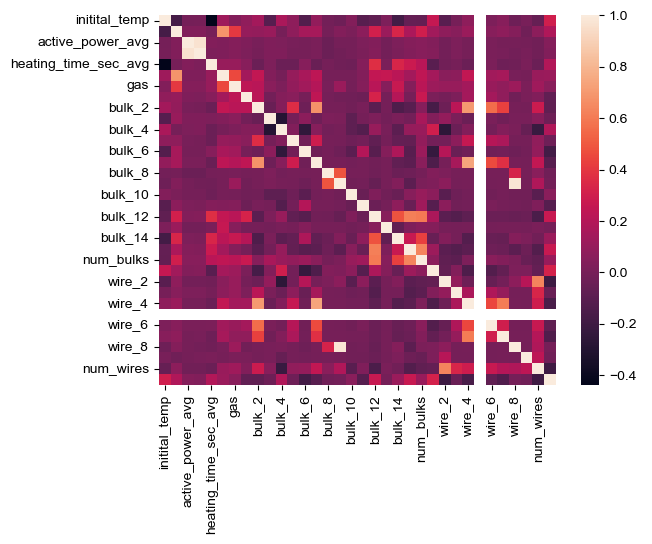

In [124]:
sns.heatmap(data_features.corr());
sns.set(rc={'figure.figsize':(15,15)})

In [125]:
correlations = data_features.corr()
features_name = list(correlations.columns)
correlations_values = correlations.values
n = len(features_name)
cor = []
for i in range(n):
    for j in range(n):
        if (0.5 <= correlations_values[i][j] < 1) or (-1 < correlations_values[i][j] < -0.5):
            if (features_name[j], features_name[i]) not in cor:
                cor.append((features_name[i], features_name[j]))
                print(f'Корреляция между: {features_name[i]} и {features_name[j]}, значение {correlations_values[i][j]:.2f}')

Корреляция между: number_heatings и total_time, значение 0.68
Корреляция между: active_power_avg и reactive_power_avg, значение 0.97
Корреляция между: bulk_2 и bulk_7, значение 0.68
Корреляция между: bulk_2 и wire_4, значение 0.70
Корреляция между: bulk_2 и wire_6, значение 0.56
Корреляция между: bulk_7 и wire_4, значение 0.74
Корреляция между: bulk_9 и wire_8, значение 0.97
Корреляция между: bulk_12 и bulk_15, значение 0.61
Корреляция между: bulk_12 и num_bulks, значение 0.60
Корреляция между: bulk_15 и num_bulks, значение 0.63
Корреляция между: wire_2 и num_wires, значение 0.63
Корреляция между: wire_4 и wire_7, значение 0.60


Замечена сильная корреляция между средним значением активной и реактивной мощностью `reactive_power_avg`. То есть можно удалить реактивную мощность и оставить активную - ведь именно она влияет на энергопотребление и затраты на нагрев.

Корреляции с целевым признаком `temperature` особо нигде не замечено, не более 0.5.

Есть некоторые корреляции между некоторыми материалами, но они скорее всего, случайны.

`wire_5` вообще отстутсвует. Можно его удалить. В принципе как и `bulk_8` - у них всего 1 ненулевое значение.


In [126]:
# удалим лишние фичи и таргет из таблицы
target = data_features['temperature']
features = data_features.drop(['temperature', 'reactive_power_avg', 'bulk_8', 'wire_5'], axis=1)

In [138]:
# удалим лишние фичи и таргет из таблицы С большим количеством признаков (с мощностями)
#target = data_features_more['temperature']
#features = data_features_more.drop(['temperature', 'reactive_power_avg', 'bulk_8', 'wire_5'], axis=1)


Если проверить корреляцию на таблице с большим количеством признаков `data_features_more` (с мощностями), то корреляции будут больше. Больше столбцов коррелируют.

И линейная регрессия (простая) показала себя хуже на $0.1$ :
- `data_features_more` + Lin REG = MAE $6.358$
- `data_features`  + Lin REG = __MAE $6.2426$__


### Разделение на выборки 


In [127]:
features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, 
                                                                            test_size=0.25, 
                                                                            random_state=random_state)

print(f'Размер обучающей выборки: {features_train.shape}')
print(f'Размер тестовой выборки: {features_test.shape}')

Размер обучающей выборки: (1743, 30)
Размер тестовой выборки: (581, 30)


In [128]:
features_train.head()

,initital_temp,number_heatings,active_power_avg,heating_time_sec_avg,total_time,gas,bulk_1,bulk_2,bulk_3,bulk_4,...,num_bulks,wire_1,wire_2,wire_3,wire_4,wire_6,wire_7,wire_8,wire_9,num_wires
key,,,,,,,,,,,,,,,,,,,,,
420,1598.0,6,0.739349,117.666667,2903.0,14.244007,0.0,0.0,93.0,0.0,...,4,181.350006,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1
407,1554.0,5,0.534339,194.600000,1542.0,16.194449,0.0,0.0,0.0,0.0,...,2,129.261596,108.515679,279.783508,0.0,0.0,0.0,0.0,0.0,3
488,1621.0,3,0.882694,162.000000,2622.0,7.093691,0.0,0.0,0.0,41.0,...,4,92.149200,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1
1916,1614.0,5,0.859195,118.800000,2230.0,18.867788,0.0,0.0,27.0,0.0,...,2,176.772957,36.342800,293.188919,0.0,0.0,0.0,0.0,0.0,3
1667,1562.0,5,0.783033,179.200000,2211.0,11.595789,0.0,0.0,0.0,0.0,...,5,50.122799,155.293831,0.000000,0.0,0.0,0.0,0.0,0.0,2


### Масштабирование признаков

У нас все признаки количественные, так что можно масштабировать

In [129]:
# масштабирование
scaler = MinMaxScaler()
scaler.fit(features_train) 
features_train_prepared = pd.DataFrame(scaler.transform(features_train), columns=features_train.columns, index=features_train.index)
features_test_prepared = pd.DataFrame(scaler.transform(features_test), columns=features_test.columns, index=features_test.index)
print(features_train_prepared.shape)
features_train_prepared.head()

(1743, 30)


,initital_temp,number_heatings,active_power_avg,heating_time_sec_avg,total_time,gas,bulk_1,bulk_2,bulk_3,bulk_4,...,num_bulks,wire_1,wire_2,wire_3,wire_4,wire_6,wire_7,wire_8,wire_9,num_wires
key,,,,,,,,,,,,,,,,,,,,,
420,0.560284,0.333333,0.461009,0.188993,0.134830,0.273058,0.0,0.0,0.204846,0.000000,...,0.500000,0.549022,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00
407,0.248227,0.266667,0.242000,0.428660,0.070352,0.310470,0.0,0.0,0.000000,0.000000,...,0.166667,0.391329,0.383746,0.726694,0.0,0.0,0.0,0.0,0.0,0.50
488,0.723404,0.133333,0.614141,0.327103,0.121518,0.135905,0.0,0.0,0.000000,0.145907,...,0.500000,0.278974,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00
1916,0.673759,0.266667,0.589038,0.192523,0.102947,0.361749,0.0,0.0,0.059471,0.000000,...,0.166667,0.535166,0.128520,0.761513,0.0,0.0,0.0,0.0,0.0,0.50
1667,0.304965,0.266667,0.507675,0.380685,0.102047,0.222262,0.0,0.0,0.000000,0.000000,...,0.666667,0.151743,0.549168,0.000000,0.0,0.0,0.0,0.0,0.0,0.25


## Обучение моделей

Информация от тимлида: `целевая метрика MAE < 6,8`

### Линейная регрессия

In [130]:
# построим простую модель линейной регрессии
print('\tLinear Regression')
model_reg = LinearRegression()
model_reg.fit(features_train_prepared, target_train)

# посчитаем предсказания
print(f'MAE на обучающей выборке:', -cross_val_score(model_reg, 
                                                    features_train_prepared, 
                                                    target_train, 
                                                    cv = 3, 
                                                    n_jobs = -1, 
                                                    scoring = 'neg_mean_absolute_error').mean())




	Linear Regression
MAE на обучающей выборке: 6.261790500914894


Посмотрим на важность признаков в линейной регрессии, нарисуя график коэффициентов регресии:

In [131]:
# важность признаков - коэффициенты регресии
importance = model_reg.coef_
f_names = features_train_prepared.columns.to_list()
for i,v in enumerate(importance):
    print(f'Feature: {f_names[i]}, Score: {v:.3f}')

Feature: initital_temp, Score: 42.820
Feature: number_heatings, Score: 61.603
Feature: active_power_avg, Score: 1.587
Feature: heating_time_sec_avg, Score: 43.050
Feature: total_time, Score: -64.631
Feature: gas, Score: -4.774
Feature: bulk_1, Score: -12.242
Feature: bulk_2, Score: 17.241
Feature: bulk_3, Score: 0.563
Feature: bulk_4, Score: 0.827
Feature: bulk_5, Score: -4.706
Feature: bulk_6, Score: -6.213
Feature: bulk_7, Score: -13.013
Feature: bulk_9, Score: -7.040
Feature: bulk_10, Score: 1.409
Feature: bulk_11, Score: -4.070
Feature: bulk_12, Score: 2.868
Feature: bulk_13, Score: -3.621
Feature: bulk_14, Score: -0.562
Feature: bulk_15, Score: 4.912
Feature: num_bulks, Score: -5.913
Feature: wire_1, Score: 10.949
Feature: wire_2, Score: -12.386
Feature: wire_3, Score: -4.027
Feature: wire_4, Score: -27.572
Feature: wire_6, Score: -0.761
Feature: wire_7, Score: -33.371
Feature: wire_8, Score: 9.921
Feature: wire_9, Score: -0.549
Feature: num_wires, Score: 1.203


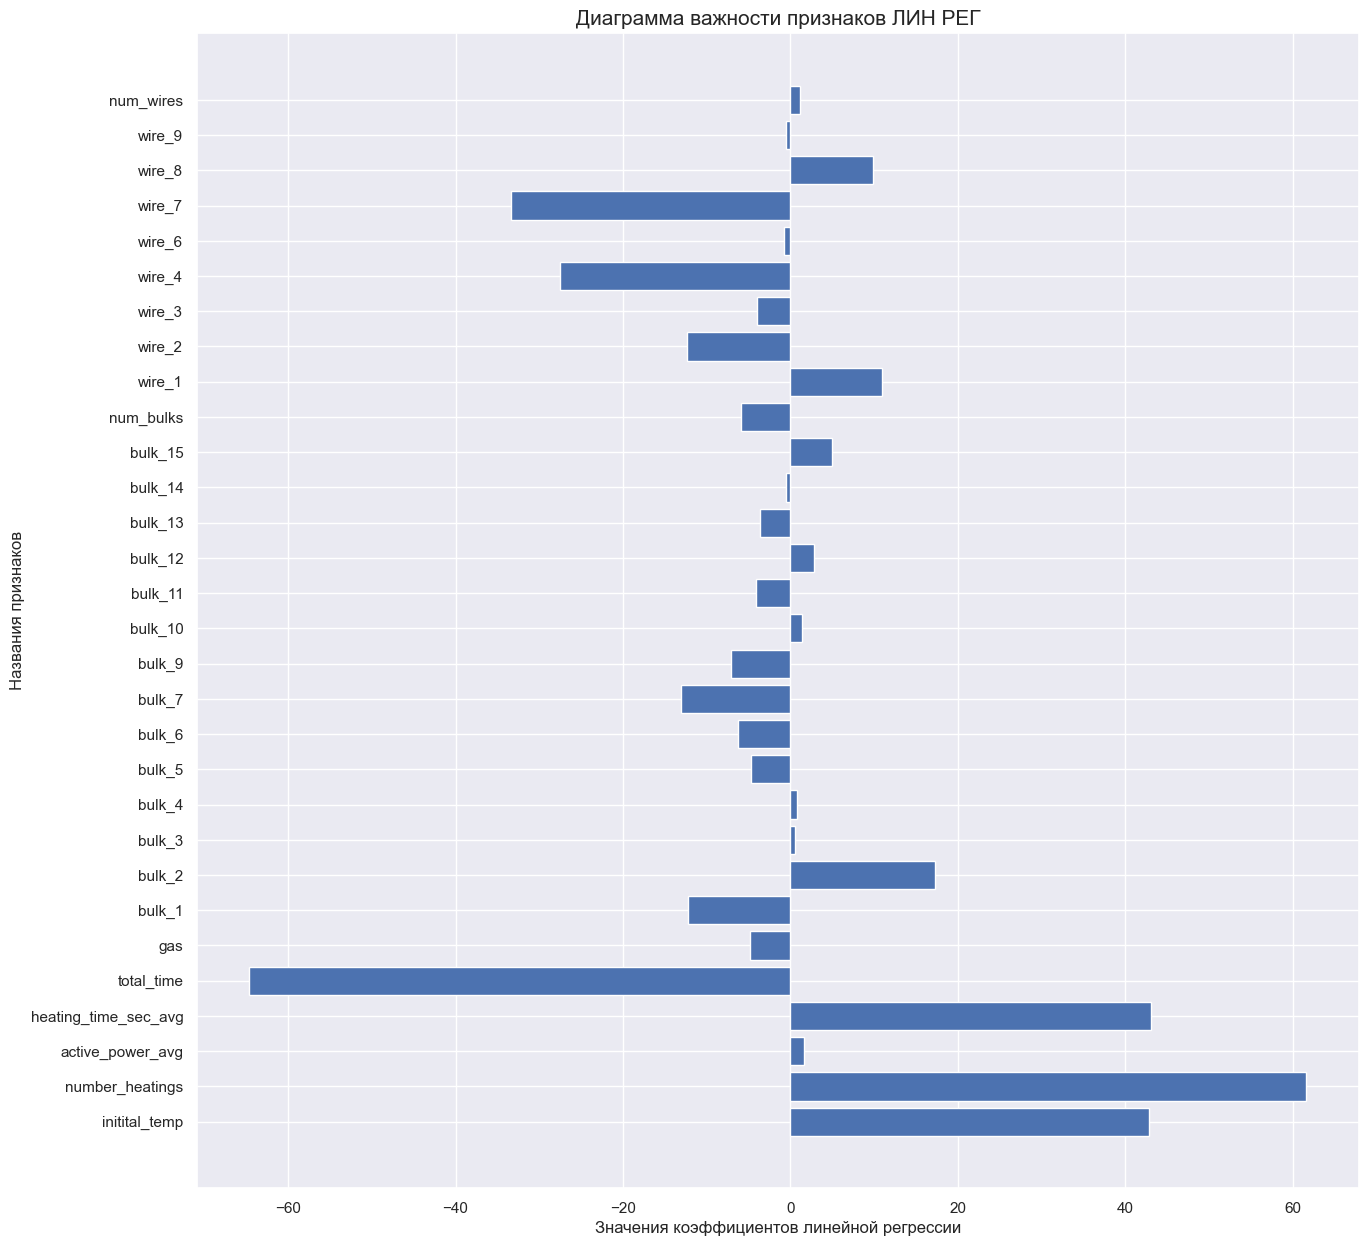

In [132]:
# нарисуем график 
plt.barh(f_names, importance)
plt.title('Диаграмма важности признаков ЛИН РЕГ', size=15);
plt.xlabel('Значения коэффициентов линейной регрессии', size=12);
plt.ylabel('Названия признаков', size=12);
plt.show()

Исходя из графика, наибольшие коэффициенты в линейной регресии: `total_time`, `number_heatings`, `heating_time_sec_avg`, `initital_temp`, `wire_7`, `bulk_2`, `wire_4`, `wire_1` - значит, значения именно этих признаков больше всего повлияли на результат.

### Lasso и Ridge

In [133]:
%%time
# линейная регрессия с L1 - регулизацией (Lasso)
print('\tLasso Regression')

model_lasso = Lasso(random_state=random_state)
parameters = {'alpha': [10, 1, 0.1, 2, 0.01, 0.05, 0.005, 0.001, 0.0001],
              'max_iter': [500, 1000, 2000]           
             }

grid_lasso = GridSearchCV(model_lasso, parameters, cv=3, verbose=2, n_jobs=-1, scoring = 'neg_mean_absolute_error')
grid_lasso.fit(features_train_prepared, target_train)

print(f'---\nMAE на обучающей выборке: {abs(grid_lasso.best_score_)}')
print('Гиперпараметры:', grid_lasso.best_params_)

	Lasso Regression
Fitting 3 folds for each of 27 candidates, totalling 81 fits
---
MAE на обучающей выборке: 6.226888768521495
Гиперпараметры: {'alpha': 0.01, 'max_iter': 500}
Wall time: 1.15 s


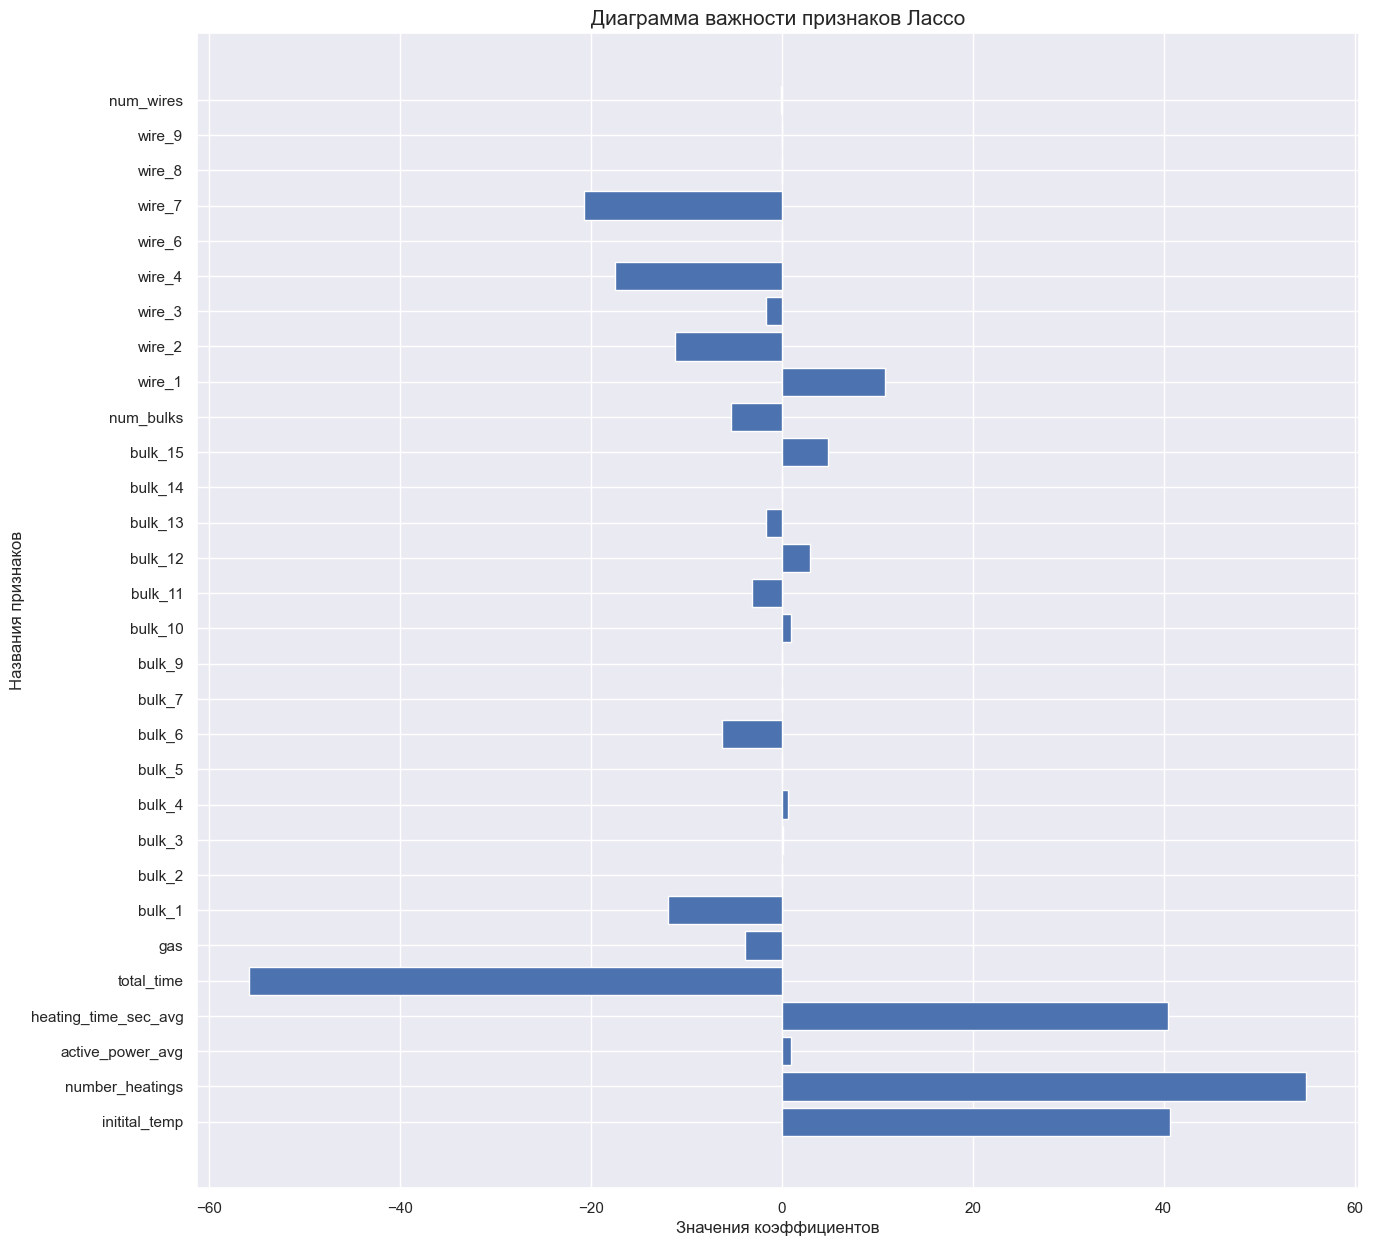

In [140]:
# важность признаков - коэффициенты регресии
importance = grid_lasso.best_estimator_.coef_
f_names = features_train_prepared.columns.to_list()
#for i,v in enumerate(importance):
#    print(f'Feature: {f_names[i]}, Score: {v:.3f}')
# нарисуем график 
plt.barh(f_names, importance)
plt.title('Диаграмма важности признаков Лассо', size=15);
plt.xlabel('Значения коэффициентов', size=12);
plt.ylabel('Названия признаков', size=12);
plt.show()

In [141]:
%%time
# линейная регрессия с L2 - регулизацией (Ridge)
print('\tRidge Regression')

model_ridge = Ridge(random_state=random_state)
parameters = {'alpha': [0.0001, 0.005, 0.001, 0.01, 0.1, 0.5, 1, 2, 10],
              'max_iter': [500, 1000, 2000]           
             }

grid_ridge = GridSearchCV(model_ridge, parameters, cv=3, verbose=2, n_jobs=-1, scoring = 'neg_mean_absolute_error')
grid_ridge.fit(features_train_prepared, target_train)

print(f'---\nMAE на обучающей выборке: {abs(grid_ridge.best_score_)}')
print('Гиперпараметры:', grid_ridge.best_params_)

	Ridge Regression
Fitting 3 folds for each of 27 candidates, totalling 81 fits
---
MAE на обучающей выборке: 6.237370556859116
Гиперпараметры: {'alpha': 0.1, 'max_iter': 500}
Wall time: 151 ms


Обе модели линейной регрессии с регуляризацией показали себя лучше простой регрессии:
- Lin Reg MAE 6.2617
- __Lasso MAE $6.2268$__. Параметр `alpha` = 0.01.
- Ridge MAE 6.2373

### Адекватность

In [142]:
# адекватность на Dummy 
print('\tDummy Regressor')
model_dummy = DummyRegressor()
model_dummy.fit(features_train_prepared, target_train) 

print(f'MAE на обучающей выборке:', -cross_val_score(model_dummy, 
                                                    features_train_prepared, 
                                                    target_train, 
                                                    cv = 3, 
                                                    n_jobs = -1, 
                                                    scoring = 'neg_mean_absolute_error').mean())

	Dummy Regressor
MAE на обучающей выборке: 8.201693916062581


Критерий адекватности модели: значение МАЕ на обучающей выборке __меньше 8.2__ .

### LigthGBM

In [143]:
%%time
# LightGBM. Подбор параметров. Pipeline
print('\tLight GBM Regressor (GridSearchCV)')
parameters = {'model__max_depth': [-1, 1, 2, 3, 5, 10, 30],
              'model__n_estimators': [50, 100, 200, 300, 400, 500], 
              'model__learning_rate': [0.3, 0.1, 0.05, 0.01, 0.001],
              'model__num_leaves':[5, 10, 20, 30, 50],
              'model__min_child_weight': [0.0001, 0.001, 0.01],
              'model__min_child_samples': [20, 10, 30]
              #'model__min_split_gain' : [0, ]
             }

pipeline = Pipeline([
    ('scaler', MinMaxScaler()), # StandardScaler
    ('model', LGBMRegressor(random_state=random_state))])

grid_lgbm = GridSearchCV(pipeline, cv=3, n_jobs=-1, verbose=2, param_grid=parameters, scoring='neg_mean_absolute_error')
grid_lgbm.fit(features_train, target_train) # обучаем на features_train т.к. масштабирование в пайплайне

print(f'---\nMAE на обучающей выборке: {abs(grid_lgbm.best_score_)}')
print('Гиперпараметры:', grid_lgbm.best_params_)

	Light GBM Regressor (GridSearchCV)
Fitting 3 folds for each of 9450 candidates, totalling 28350 fits
---
MAE на обучающей выборке: 6.196387445218986
Гиперпараметры: {'model__learning_rate': 0.1, 'model__max_depth': 2, 'model__min_child_samples': 10, 'model__min_child_weight': 0.0001, 'model__n_estimators': 400, 'model__num_leaves': 5}
Wall time: 13min 59s


LightGBM при _существенном_ подборе гиперпараметров (6 параметров по 3-7 вариантов), показала себя немного лучше линейной регрессии, 
- MAE `lgbm` = 6.196 
- MAE `linreg` = 6.261

Без подбора параметров - хуже (было несколько итераций подбора, только с `learning_rate`, `max_depth`, `n_estimators`)


Посмотрим на важность признаков с помощью библиотеки `shap`:

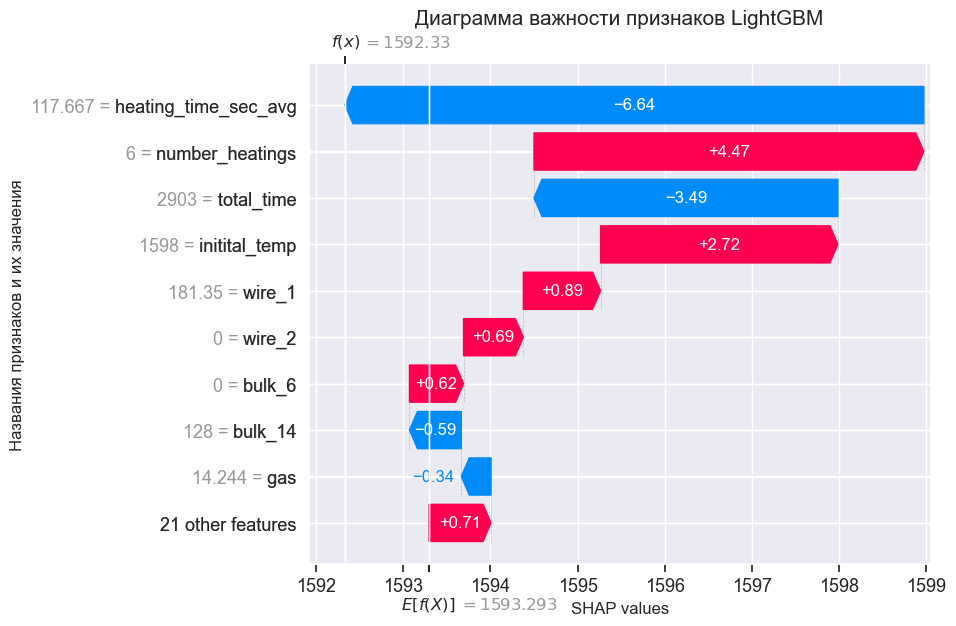

In [144]:
model_lgbm = grid_lgbm.best_estimator_.steps[1][1]
model_lgbm.fit(features_train, target_train)

explainer = shap.Explainer(model_lgbm)
shap_values = explainer(features_train)

# визуализируем объяснение первого предсказания
plt.title('Диаграмма важности признаков LightGBM', size=15)
plt.ylabel('Названия признаков и их значения', size=12)
plt.xlabel('SHAP values', size=12)
shap.plots.waterfall(shap_values[0])

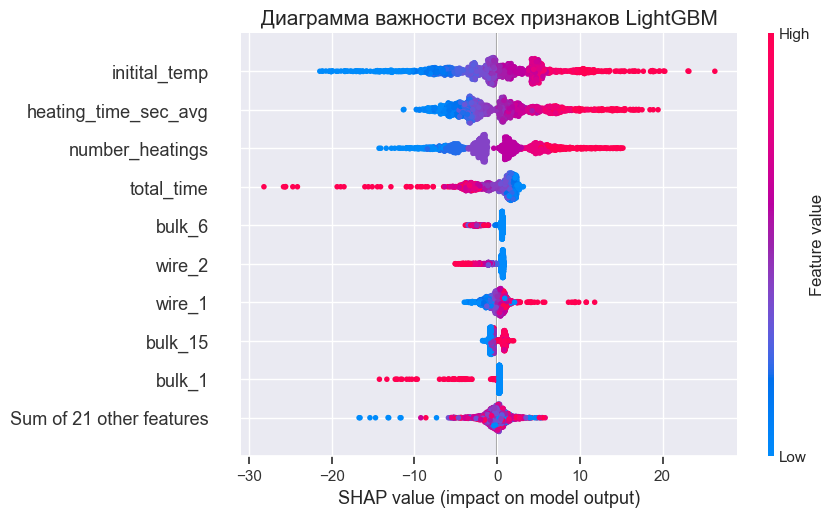

In [148]:
plt.title('Диаграмма важности всех признаков LightGBM', size=15)
# обобщим эффекты всех функций
shap.plots.beeswarm(shap_values)

Была проанализирована модель градиентного бустинга Light GBM и основные фичи, влияющие на результат: 
- среднее значение времени нагрева `heating_time_sec_avg`, 
- количество нагреваний `number_heatings`, 
- общее время обработки (с начала первого нагрева до конца последнего) `total_time`,
- начальная температура `initital_temp`, 
- значение объема поданного газа `gas`,
- а также в некоторой степени повлияли значения некоторых сыпучих и проволочных материалов: `wire_1`, `wire_2`, `bulk_6`, `bulk_14`.

Следует заметить, что первые 4 признака были также важны и в линейной регресии.

### Random Forest

In [163]:
%%time
# Random Forest. Подбор параметров. Pipeline
print('\tRandom Forest Regressor (GridSearchCV)')

parameters = {'model__max_depth': [None, 2, 5, 10, 30],
              'model__n_estimators': [300, 500, 700], ## 50, 100
              'model__min_samples_split':[3, 5, 7, 10], # 2
              'model__min_samples_leaf': [1, 2, 3, 5]
             }

pipeline = Pipeline([
    ('scaler', StandardScaler()), #  MinMaxScaler
    ('model', RandomForestRegressor(random_state=random_state))])

grid_forest = GridSearchCV(pipeline, cv=3, n_jobs=-1, verbose=2, param_grid=parameters, scoring='neg_mean_absolute_error')
grid_forest.fit(features_train, target_train) # обучаем на features_train т.к. масштабирование в пайплайне

print(f'---\nMAE на обучающей выборке: {abs(grid_forest.best_score_)}')
print('Гиперпараметры:', grid_forest.best_params_)

	Random Forest Regressor (GridSearchCV)
Fitting 3 folds for each of 240 candidates, totalling 720 fits
---
MAE на обучающей выборке: 6.715097026015758
Гиперпараметры: {'model__max_depth': 30, 'model__min_samples_leaf': 3, 'model__min_samples_split': 3, 'model__n_estimators': 500}
Wall time: 10min 27s


- 1 итерация: `max_depth`: None, `min_samples_leaf`: 2, `min_samples_split`: 5, `n_estimators`: 500; $MAE = 6.72797$
- 2 итерация: `max_depth`: 30, `min_samples_leaf`: 3, `min_samples_split`: 3, `n_estimators`: 500; $MAE = 6.71509$

Посмотрим на важность признаков с помощью `feature_importance_`:

Feature: initital_temp, Score: 0.169
Feature: number_heatings, Score: 0.047
Feature: active_power_avg, Score: 0.037
Feature: heating_time_sec_avg, Score: 0.124
Feature: total_time, Score: 0.086
Feature: gas, Score: 0.048
Feature: bulk_1, Score: 0.011
Feature: bulk_2, Score: 0.003
Feature: bulk_3, Score: 0.019
Feature: bulk_4, Score: 0.016
Feature: bulk_5, Score: 0.001
Feature: bulk_6, Score: 0.057
Feature: bulk_7, Score: 0.024
Feature: bulk_9, Score: 0.000
Feature: bulk_10, Score: 0.002
Feature: bulk_11, Score: 0.003
Feature: bulk_12, Score: 0.070
Feature: bulk_13, Score: 0.000
Feature: bulk_14, Score: 0.055
Feature: bulk_15, Score: 0.047
Feature: num_bulks, Score: 0.009
Feature: wire_1, Score: 0.106
Feature: wire_2, Score: 0.044
Feature: wire_3, Score: 0.001
Feature: wire_4, Score: 0.007
Feature: wire_6, Score: 0.002
Feature: wire_7, Score: 0.004
Feature: wire_8, Score: 0.000
Feature: wire_9, Score: 0.000
Feature: num_wires, Score: 0.008


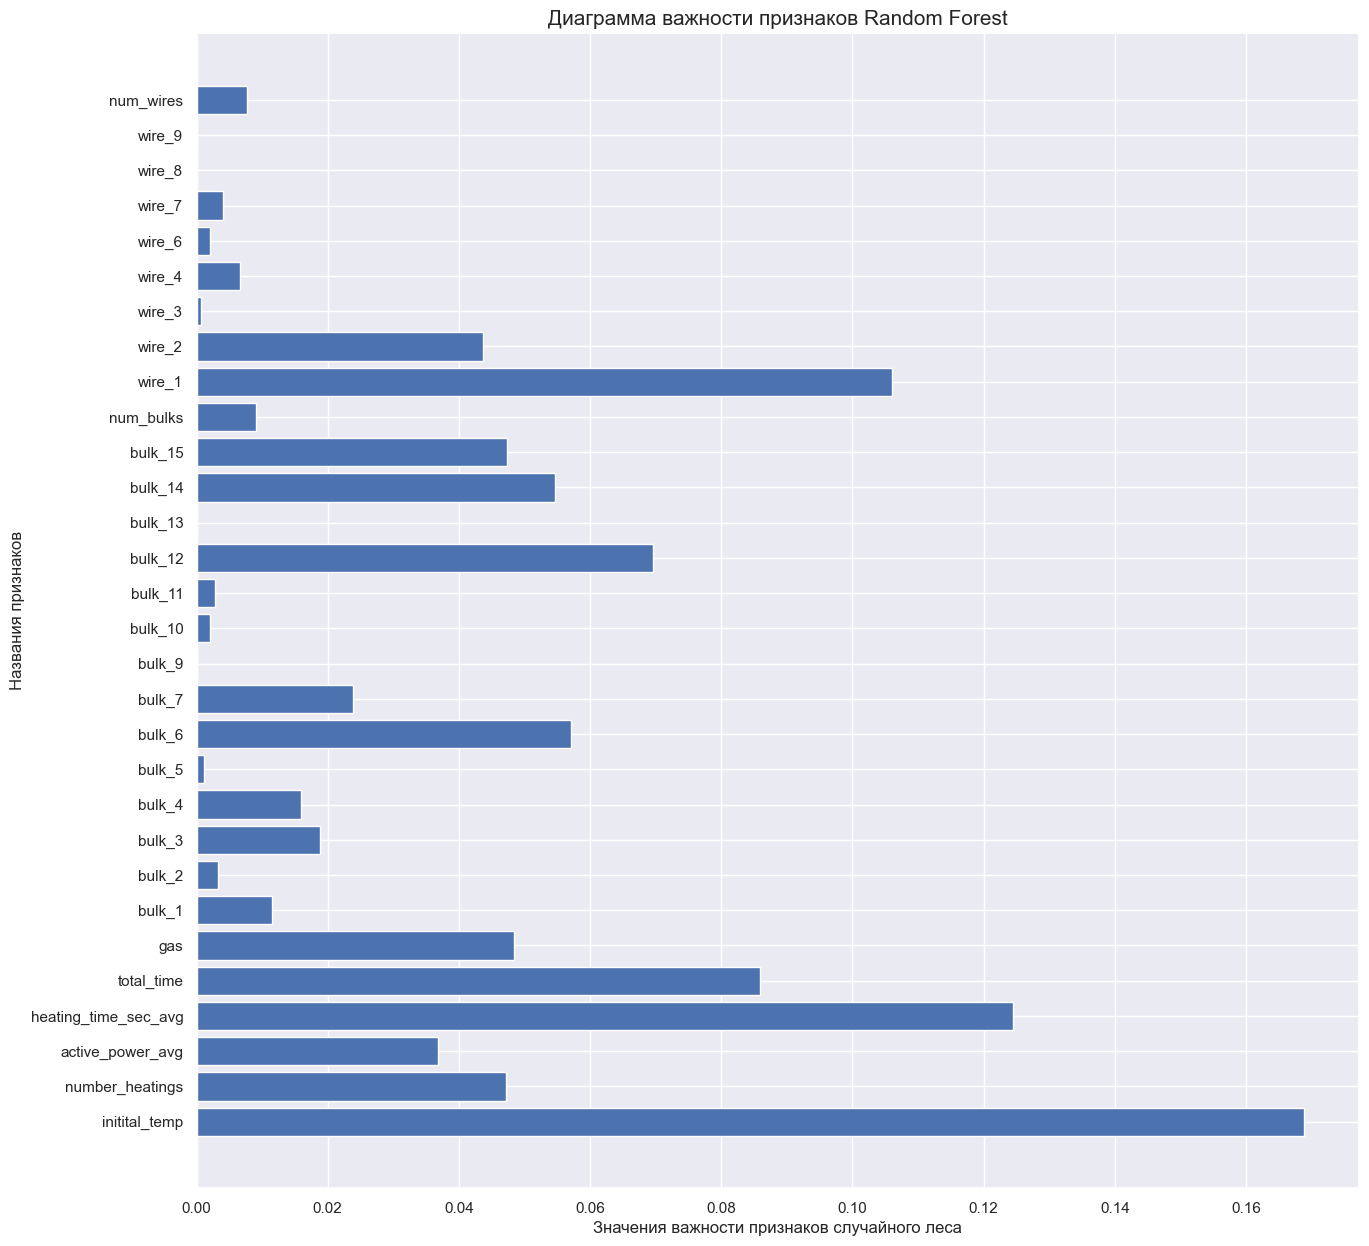

In [203]:
importance = grid_forest.best_estimator_.steps[1][1].feature_importances_
f_names = features_train_prepared.columns.to_list()
for i,v in enumerate(importance):
    print(f'Feature: {f_names[i]}, Score: {v:.3f}')
# построим диаграмму
plt.barh(f_names, importance)
plt.title('Диаграмма важности признаков Random Forest', size=15);
plt.xlabel('Значения важности признаков случайного леса', size=12);
plt.ylabel('Названия признаков', size=12);
plt.show()

### GradientBoosting Regressor

In [164]:
%%time
# GradientBoosting Regressor. Подбор параметров. Pipeline
print('\tGradientBoosting Regressor (GridSearchCV)')
parameters = {'model__max_depth': [2, 3, 5, 10], # None
              'model__n_estimators': [50, 100, 300, 500], 
              'model__learning_rate': [0.1, 0.01, 0.001],
              'model__min_samples_leaf': [1, 2, 5],
              'model__min_samples_split': [2, 3, 5]
             }

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', GradientBoostingRegressor(random_state=random_state))])

grid_boost = GridSearchCV(pipeline, cv=3, n_jobs=-1, verbose=2, param_grid=parameters, scoring='neg_mean_absolute_error')
grid_boost.fit(features_train, target_train) # обучаем на features_train т.к. масштабирование в пайплайне

print(f'---\nMAE на обучающей выборке: {abs(grid_boost.best_score_)}')
print('Гиперпараметры:', grid_boost.best_params_)

	GradientBoosting Regressor (GridSearchCV)
Fitting 3 folds for each of 432 candidates, totalling 1296 fits
---
MAE на обучающей выборке: 6.192529805397959
Гиперпараметры: {'model__learning_rate': 0.1, 'model__max_depth': 2, 'model__min_samples_leaf': 5, 'model__min_samples_split': 2, 'model__n_estimators': 500}
Wall time: 8min 24s


Модель градиентного бустинга из библиотеки scikit-learn показала на данном этапе наилучший результат при подборе параметров:
 - __МАЕ = 6.19252__
 - Гиперпараметры: `max_depth`: 2, `n_estimators`: 500, `learning_rate`: 0.1, `min_samples_leaf`: 5, `min_samples_split`: 2 

In [198]:
grid_boost.best_estimator_.steps[1][1]

GradientBoostingRegressor(max_depth=2, min_samples_leaf=5, n_estimators=500,
                          random_state=240423)

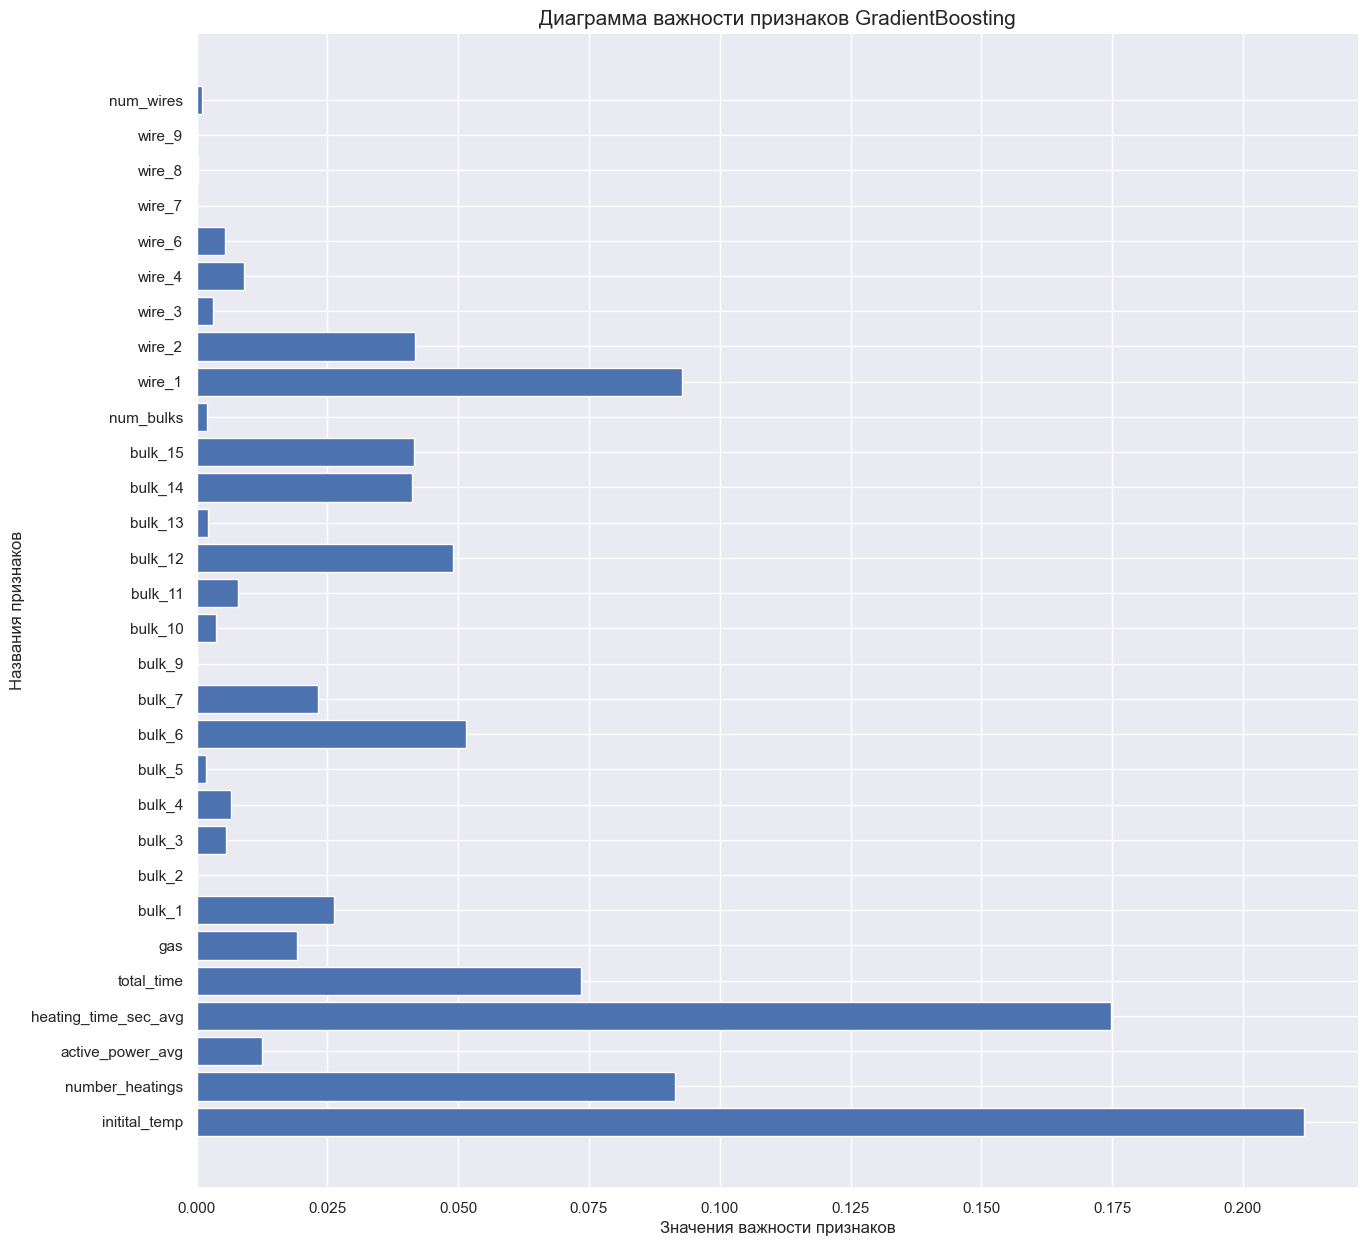

In [202]:
importance = grid_boost.best_estimator_.steps[1][1].feature_importances_
f_names = features_train_prepared.columns.to_list()
#for i,v in enumerate(importance):
#    print(f'Feature: {f_names[i]}, Score: {v:.3f}')
# построим диаграмму
plt.barh(f_names, importance)
plt.title('Диаграмма важности признаков GradientBoosting', size=15);
plt.xlabel('Значения важности признаков', size=12);
plt.ylabel('Названия признаков', size=12);
plt.show()

### CatBoost

In [165]:
%%time
# CatBoost попробуем без масштабирования. Значит pipeline не нужен, только GridSearchCV
print('\tCatBoost Regressor (GridSearchCV)')
model_cat = CatBoostRegressor(random_state=random_state)
parameters = {'depth': [-1, 3, 5, 10, 50],
              'learning_rate': [0.01, 0.05, 0.1, 0.5],
              'iterations': [50, 100, 300, 500, 700]
             }

grid_cat = GridSearchCV(model_cat, parameters, cv=3, n_jobs=-1, verbose=1, scoring = 'neg_mean_absolute_error')
grid_cat.fit(features_train, target_train)

print(f'---\nMAE на обучающей выборке: {abs(grid_cat.best_score_)}')
print('Гиперпараметры:', grid_cat.best_params_)

	CatBoost Regressor (GridSearchCV)
Fitting 3 folds for each of 100 candidates, totalling 300 fits
0:	learn: 11.2447197	total: 146ms	remaining: 1m 41s
1:	learn: 11.1387316	total: 149ms	remaining: 52.1s
2:	learn: 11.0280476	total: 152ms	remaining: 35.3s
3:	learn: 10.9237440	total: 155ms	remaining: 27s
4:	learn: 10.8217679	total: 159ms	remaining: 22s
5:	learn: 10.7434385	total: 161ms	remaining: 18.6s
6:	learn: 10.6567463	total: 164ms	remaining: 16.2s
7:	learn: 10.5626107	total: 167ms	remaining: 14.4s
8:	learn: 10.4806890	total: 170ms	remaining: 13.1s
9:	learn: 10.4102742	total: 173ms	remaining: 11.9s
10:	learn: 10.3395167	total: 176ms	remaining: 11s
11:	learn: 10.2519951	total: 180ms	remaining: 10.3s
12:	learn: 10.1843908	total: 183ms	remaining: 9.69s
13:	learn: 10.1166273	total: 188ms	remaining: 9.22s
14:	learn: 10.0780768	total: 191ms	remaining: 8.71s
15:	learn: 10.0093906	total: 194ms	remaining: 8.29s
16:	learn: 9.9373994	total: 197ms	remaining: 7.9s
17:	learn: 9.8781951	total: 200ms	r

Теперь у нас есть победитель - __CatBoost__, без масштабирования:
- 1 итерация: $MAE = 6.17215$, еще немного лучше, чем у Gradient Boosting Regressor; гиперпараметры: `depth`: 5, `iterations`: 500, `learning_rate`: 0.05
- 2 итерация: $MAE = 6.16284$, еще немного лучше; гиперпараметры: `depth`: 5, `iterations`: 700, `learning_rate`: 0.05

In [166]:
%%time
# CatBoost Regressor. Подбор параметров. Pipeline - масштабирование
print('\tCatBoost Regressor (GridSearchCV)')
parameters = {'model__depth': [-1, 3, 5, 10], # 50],
              'model__learning_rate': [0.01, 0.05, 0.1], # 0.5],
              'model__iterations': [300, 500, 700] # 50, 100, 
             } 

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', CatBoostRegressor(random_state=random_state))])

grid_catm = GridSearchCV(pipeline, cv=3, n_jobs=-1, verbose=1, param_grid=parameters, scoring='neg_mean_absolute_error')
grid_catm.fit(features_train, target_train) 

print(f'---\nMAE на обучающей выборке: {abs(grid_catm.best_score_)}')
print('Гиперпараметры:', grid_catm.best_params_)

	CatBoost Regressor (GridSearchCV)
Fitting 3 folds for each of 36 candidates, totalling 108 fits
0:	learn: 11.2447197	total: 3.71ms	remaining: 1.85s
1:	learn: 11.1387316	total: 6.66ms	remaining: 1.66s
2:	learn: 11.0280476	total: 9.26ms	remaining: 1.53s
3:	learn: 10.9237440	total: 11.7ms	remaining: 1.45s
4:	learn: 10.8217679	total: 14.5ms	remaining: 1.44s
5:	learn: 10.7434385	total: 16.9ms	remaining: 1.39s
6:	learn: 10.6573299	total: 19ms	remaining: 1.34s
7:	learn: 10.5631772	total: 21.1ms	remaining: 1.29s
8:	learn: 10.4812528	total: 23.6ms	remaining: 1.29s
9:	learn: 10.4108401	total: 25.6ms	remaining: 1.26s
10:	learn: 10.3400846	total: 28.5ms	remaining: 1.27s
11:	learn: 10.2525634	total: 31.7ms	remaining: 1.29s
12:	learn: 10.1849540	total: 34.6ms	remaining: 1.3s
13:	learn: 10.1172066	total: 37.2ms	remaining: 1.29s
14:	learn: 10.0786596	total: 40ms	remaining: 1.29s
15:	learn: 10.0099646	total: 42.4ms	remaining: 1.28s
16:	learn: 9.9379558	total: 44.9ms	remaining: 1.28s
17:	learn: 9.87875

- 3 итерация: $MAE = 6.15314$, еще немного лучше, с масштабированием `StandardScaler`; гиперпараметры: `depth`: 5, `iterations`: 500, `learning_rate`: 0.05

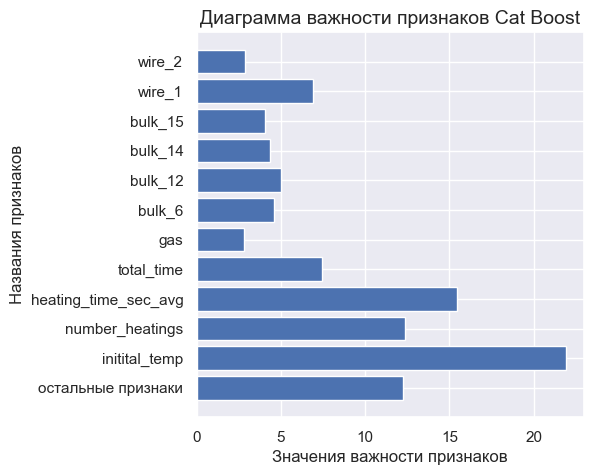

In [234]:
importance = grid_catm.best_estimator_.steps[1][1].feature_importances_
f_names = features_train_prepared.columns.to_list()
imp = {}
imp['остальные признаки'] = 0
for i, v in enumerate(importance):
    if v > importance.mean() - 1 :
        imp[f_names[i]] = v
    else:
        imp['остальные признаки'] += v
# построим диаграмму
plt.figure(figsize=(5,5))
plt.barh(list(imp.keys()), imp.values())
plt.title('Диаграмма важности признаков Cat Boost', size=14);
plt.xlabel('Значения важности признаков', size=12);
plt.ylabel('Названия признаков', size=12);
plt.show()

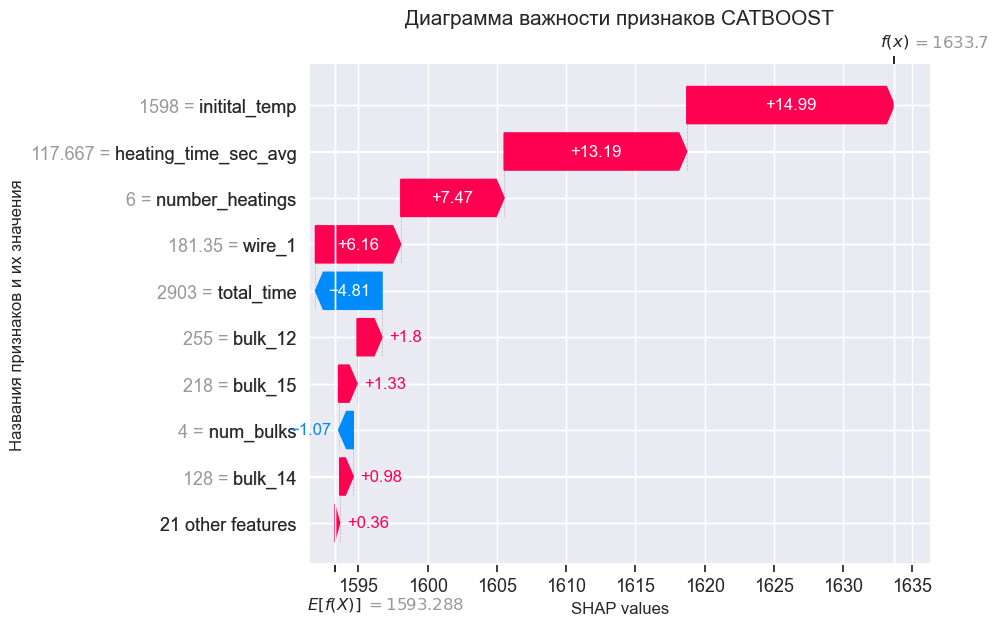

In [239]:
model_cat = grid_catm.best_estimator_.steps[1][1]

explainer = shap.Explainer(model_cat)
shap_values = explainer(features_train)

# visualize the first prediction's explanation
plt.title('Диаграмма важности признаков CATBOOST', size=15)
plt.ylabel('Названия признаков и их значения', size=12)
plt.xlabel('SHAP values', size=12)
shap.plots.waterfall(shap_values[0])
plt.show()

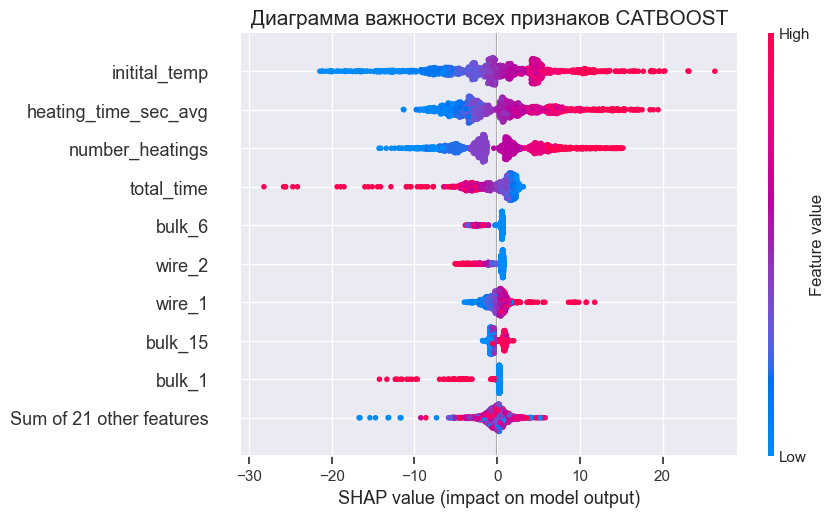

In [149]:
plt.title('Диаграмма важности всех признаков CATBOOST', size=15)
# обобщим эффекты всех функций
shap.plots.beeswarm(shap_values)

По модели градиентного бустинга CATBOOST можно выделить основные фичи, влияющие на результат: 
1. начальная температура `initital_temp`, 
2. среднее значение времени нагрева `heating_time_sec_avg`, 
3. количество нагреваний `number_heatings`, 
4. Проволочный материал `wire_1` (который чаще всего добавлялся),
5. общее время обработки (с начала первого нагрева до конца последнего) `total_time`,

- а также в некоторой степени повлияли значения некоторых сыпучих материалов: `bulk_12`, `bulk_15`, `bulk_14`, b количество засыпанных материалов `num_bulks`.

Порядок влияния отличается, но в целом основные признаки во всех моделях одни и те же.

### Сводка по обучению
Сводка по моделям на обучающей выборке с использованием кросс-валидации:

| Модель                       | Гиперпараметры                               | Точность результата (MAE) | 
|:----------------------------:|:----------------------------------------------------------:|:------------------------------:|
| Линейная регрессия           | _без подбора_                                              | 6.26179     |
| Lasso                        | `alpha`: 0.01, `max_iter`: 500                             | 6.22688     |
| Ridge                        | `alpha`: 0.1, `max_iter`: 500                              | 6.23737     |
| | | |
| __Light GBM__                | `learning_rate`: 0.1, `max_depth`: 2, `n_estimators`: 400, | __6.19638__ |
|                              |  `min_child_samples`: 10, `min_child_weight`: 0.0001,  `num_leaves`: 5 | |
| Random Forest                | `max_depth`: 30, `min_samples_leaf`: 3, `min_samples_split`: 3, `n_estimators`: 500 |  6.71509  |
| __Gradient Boosting Regressor__| `max_depth`: 2, `n_estimators`: 500, `learning_rate`: 0.1 | __6.19252__ |
|                              | `min_samples_leaf`: 5, `min_samples_split`: 2        |  |
| __CatBoost__                 | `depth`: 5, `iterations`: 500, `learning_rate`: 0.05 | __6.15314__ |

## Тестирование 

In [210]:
predictions_test = grid_catm.predict(features_test) 
print('Результат тестирования модели __CatBoost__')
print('MAE =', mean_absolute_error(target_test, predictions_test)) 

Результат тестирования модели __CatBoost__
MAE = 5.608615303929256


Результат на тестовой выборке __CatBoost__: $MAE = 5.6086$


## Общий вывод

1. Проведено обучение и подбор оптимальных параметров для следующих моделей машинного обучения:
    - линейная регрессия сразу показала достаточно хороший результат на кросс-валидации;
    - проведена оценка адекватности моделей. Значение МАЕ на обучающей выборке должно быть меньше 8.2;
    - линейная регрессия с L1 и L2 регуляризацией - Ridge, Lasso;
    - Light GBM - модель градиентного бустинга компании Microsoft, показала наилучший результат;
    - Random Forest - модель случайного леса, даже с подбором параметров - худший результат по метрике;
    - _Gradient Boosting Regressor_ - модель градиентного бустинга из sklearn, показала достойный результат, лучше Light GBM;
    - __CatBoost__ - модель градиентного бустинга компании Яндекс, использовали без предварительного масштабирования, справилась лучше всех, значение `МАЕ` на обучающей выборке = `6.17`.
    
    
2. Выбрана оптимальная по качеству модель - __CatBoost__. Запуск на тестовой выборке подтвердил высокую точность модели, целевая метрика __`MAE = 5.609`__.

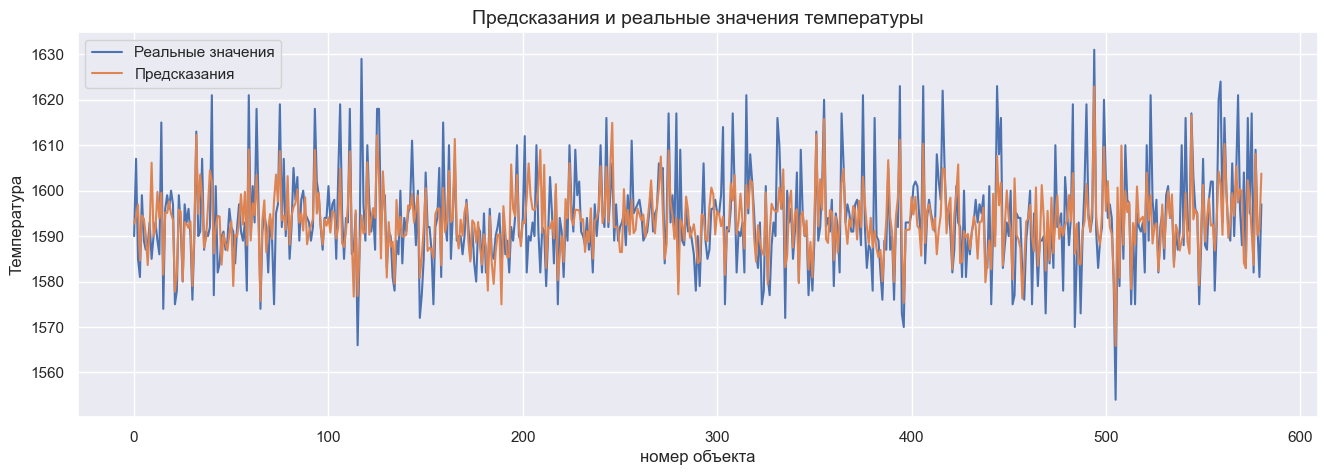

In [211]:
# нарисуем график сравнения предсказанных значений температуры и реальных
plotting = pd.DataFrame(target_test)
plotting.columns = ['Реальные значения']
plotting['Предсказания'] = predictions_test
plotting = plotting.reset_index().drop('key', axis=1)

plotting.plot(figsize=(16,5))
plt.title('Предсказания и реальные значения температуры', fontsize=14)
plt.xlabel('номер объекта', fontsize=12)
plt.ylabel('Температура', fontsize=12)
plt.show()

## Отчет о проекте Data Science: Промышленность. Температура обработка стали

Этот отчет содержит информацию о выполненном проекте по теме: Промышленность, оптимизация расходов на потребление электроэнергии на этапе обработки стали за счет предсказания оптимальной температуры стали в ковше.


### Определение проблемы

Цель работы: построить модель, которая предскажет температуру стали в ковше, в котором происходит обработка стали (нагрев, добавление разных материалов, газа и замер температуры).

Набор данных предоставлен металлургическим комбинатом ООО «Так закаляем сталь». 

Цель заказчика - оптимизация расходов по потреблению электроэнергии на этапе обработки стали.


### План 

План построен в соответсвии с жизненным циклом анализа данных по методологии CRISP-DM, включая все этапы, за исключением последнего (внедрения).


1. `Начальное изучение данных и понимание бизнес-целей`

     заключается в изучении всех предоставленных таблиц, построении графиков: распределения, гистограммы; нахождении и изучении проблемы с выбросами и аномалиями, если такие имеются; нахождении и обработки пропуски и дубликаты, если такие имеются;
    
    
2. `Подготовка данных` содержит в себе следующие действия:
    
    выделить целевой признак; объединить или агрегировать данные в одну таблицу для построения модели; выявить ненужные признаки; создание дополнительных признаков, если такое возможно; проверить корреляцию признаков; выполнить кодирование и масштабирование признаков, если потребуется; разделить данные на обучающую и тестовую выборки;
    
    
3. `Моделирование`.

    В этой части происходит обучение моделей:
    - Линейная регрессия, Ridge, Lasso;
    - Случайный лес;
    - Градиентный бустинг: GradientBoostingRegressor, LGBM и Catboost;
    
    Для всех моделей использовался подбор гиперпараметров с помощью GridSearchCV. Использовать пайплайн, если нужно. Сделать сводку по обученным моделям по метрике и времени обучения, для выбора наилучшей. Проверить на адекватность модели.
    
    
4. `Оценка`: протестировать выбранную модель на тестовой выборке, оценить результаты.
    
    Если результаты не устраивают, провести дополнительный анализ, предобработку данных, обучение моделей.
    

Все пункты плана в работе были выполнены. 

### Показатели

Целевой признак - это последняя замеренная температура.

Производительность моделей машинного обучения оценивается на тестовом наборе данных, выделенном из общего предоставленного датасета случайным образом. 

Целевая метрика - MAE, mean absolute error. Значение MAE менее 6,8 будет считаться приемлемым и подходящим для развертывания.



### Понимание данных


Данные содержатся в 7 предоставленных таблицах

- `data_arc_new.csv` — данные об электродах;
- `data_bulk_new.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time_new.csv` — данные о подаче сыпучих материалов (время);
- `data_gas_new.csv` — данные о продувке сплава газом;
- `data_temp_new.csv` — результаты измерения температуры;
- `data_wire_new.csv` — данные о проволочных материалах (объём);
- `data_wire_time_new.csv` — данные о проволочных материалах (время).

Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.

Целевой признак содержится в таблице `data_temp_new.csv`.

Так как данные находятся в разных таблицах, их нужно объединить.

Всего партий 3241, однако данные о последних примерно 700 партий есть нре во всех таблицах.

__Характеристики__, которые содержатся в данных: номер партии, начало нагрева дугой, конец нагрева дугой, активная мощность, реактивная мощность, 15  сыпучих материалов (bulk_1, bulk_2, bulk_3 и т.д. ), время подачи сыпучих материалов, 9 проволочных материалов (Wire 1, Wire 2 и т.д.) и соответствующее время их подачи, объем поданного газа, время замера температуры и сама температура стали в ковше.

Ниже на графике показан процесс обработки по времени на основе одной из партий. По оси абсцис отложено время процесса, с самого первого замера температуры, до самого последнего. На оси ординат у нас 4 оси: значения температуры, мощность, поданна на нагревание, значения объема засыпанных материалов ( проволочных и сыпучих). 

Синим отмечены точки во времени замера температуры.

Красным - время наргева.

Желтым и зеленым - объем проволочных и сыпучих материалов, соответственно.

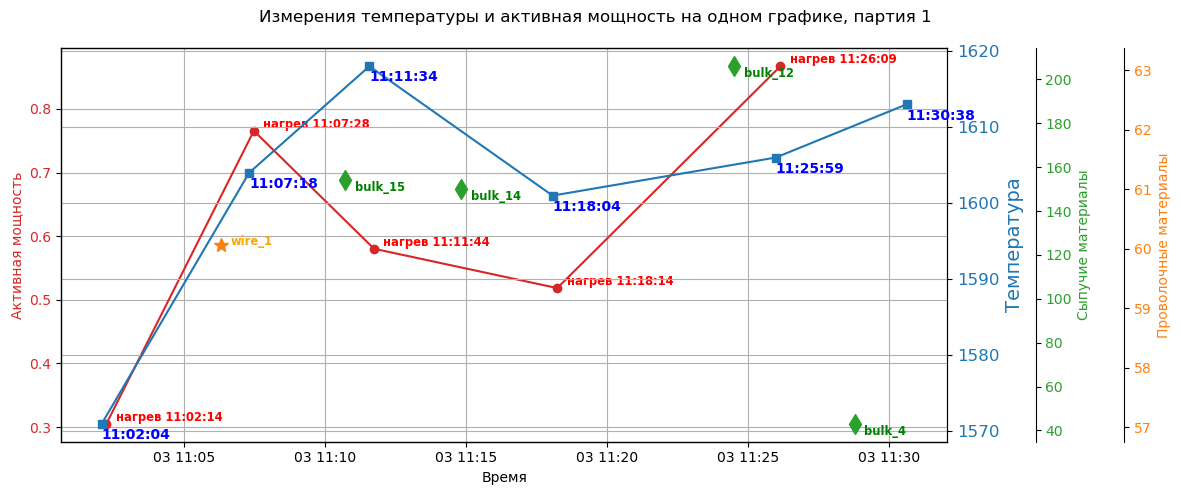

- Сначала происходит измерение температуры, с которой сталь поступила в ковш;
- Далее происходит нагрев;
- Добавление материала (одного из проволочных или сыпучих, причем как правило, сначала подаются проволочные);
- Снова измерение температуры.

Далее, если необходимо данный процесс повторяется несколько раз: нагрев, добавление, измерение. 

Так же было замечено на нескольких партиях  стали, что нагрев и измерение происходит, так сказать, в холостую, без добавления материалов, например в партии № 2108 (ниже на графике). В этой партии было наибольшее количество циклов нагреваний. И первое добавление материала произошло спустя 3 часа нахождения партии в ковше. То есть важно поддержание стали в определенной границе температур. 

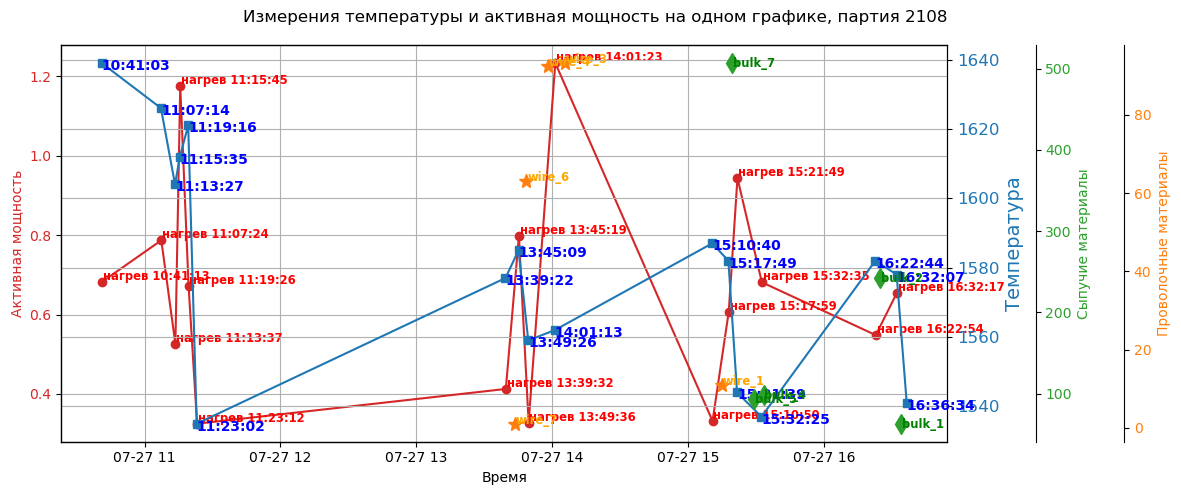

### Моделирование

#### Разработка функциональных возможностей

Сначала был выявлен __один__ объект с сильно _отрицательной реактивной мощностью_ и номер данной партии со всеми данными был удален из всех таблиц.

Были обнаружены аномалии с температурами: температура в стали в ковше не может быть ниже 1400 градусов. Обнаружено 5 партий, где температура опускалась ниже. Написана функция для удаления данных партий из всех таблиц по списку номеров партий. Данные объекты с аномально низкой температурой были удалены.

Были также удалены объекты с пропусками в температуре - из них нельзя вытащить целевой признак. Всего объектов с пропусками значений температуры было удалено - 738.

Также обнаружены 2 партии, где был проведен всего один замер температуры:  [195, 279]. В них нет целевого признака, и следовательно, они были удалены.

Явные дубликаты не были обнаружены.

Проведена замена пропусков на нулевые значения в проволочных и сыпучих материалах.

Созданы два новых признака: количество использованных матреиалов в партии, отдельно проволочных и сыпучих: `num_bulks` и `num_wires`.

Выделен __целевой признак__ - значение последней температуры. Была взята по каждой партии запись о замере с наибольшей датой изи таблицы `data_temp_new.csv`. 

Был создан еще один новый признак - начальная температура `initital_temp`, с которой начался процесс - он может использоваться как признак для обучения.

С таблицей об электродах и наргеванию стали дугой  `data_arc_new.csv` было выполнено несколько преобразований:
- добавили время КАЖДОГО нагрева в каждой партии в секундах;
- агрегируем данные по номеру партии, причем взяли: 
  - количество наргеваний в партии, 
  - среднее значение активной мощности, 
  - среднее значение реактивной мощности,
  - среднее значение времени КАЖДОГО нагрева в каждой партии;
  - время начала первого нагрева в партии,
  - время окончания последнего нагрева в партии.
- Далее создан столбец `total_time`, означающий общее время работы в партии, с начала первого наргева до конца последнего, после чего лишние столбцы со временем начала и конца партии были удалены.

После всех преобразований было проведено объединение таблиц с помощью метода `join` по номеру партии.

В итоговой таблице получилось 33 признака и 1 целевой признак, 2324 объекта (партий).

Проведена проверка на корреляцию признаков. 

Замечена сильная корреляция между средним значением активной и реактивной мощностью `reactive_power_avg`. В следствие принято решение удалить реактивную мощность и оставить активную - ведь именно она влияет на энергопотребление и затраты на нагрев.

Корреляции с целевым признаком `temperature` особо нигде не замечено, не более 0.5.

Есть некоторые корреляции между некоторыми материалами, но они скорее всего, случайны.

Признаки `wire_5` и `bulk_8` - у них всего 1 ненулевое значение, было принято решение удалить их.

***

_Так же было проведено исследование, как повлиет на обучение, если взять данные по мощностям каждого наргева в партии. Для этого перевернем ("транспонируем") таблицу и возьмем отдельно все активные мощности нагрева по аналогии с сыпучими материалами._

В отдельную таблицу `data_all_active_powers` отправили информацию по ВСЕМ нагревам (значения активной мощности) в каждой партии. Присоединим ее к остальным данным и получим таблицу `data_features_more`.
Наибольшее количество нагревов было - 16.
Если n-ного нагрева в партии не было, то значение в таблице равно 0, т.к. активная мощность, была посути, ноль.

Если проверить работу моделей МО на таблице с большим количеством признаков `data_features_more` (с мощностями), то результат будет хуже. Например, линейная регрессия показала себя хуже на аж на 3 целых :
   - `data_features_more` MAE 9.501
   - `data_features`  __MAE 6.2617__.
   
Было проверено еще несколько моделей, например случайный лес и модель градиентного бустинга Light GBM с подбором параметров
У Light GBM:
   - `data_features_more` MAE = 6.3582. 
   - `data_features` __MAE = 6.1963__. 

Все подобранные модели показывают себя хуже, линейная регресия - сильно хуже, сказывается корреляция. Модели с бустингом и случайный лес - на уровне, но на десятые доли все равно хуже.

Вывод: берем датасет `data_features` без значений мощностей каждого нагрева.

*** 

Проведено разделение на обучающую и тестовую выборки.

Размер обучающей выборки: (1743, 30), Размер тестовой выборки: (581, 30)

Проведено мастабирование признаков с помощью `MinMaxScaler` для обучения линейных моделей: линейной регресиии, Lasso и Ridge (регрессии с L1 и L2 -регуляризацией соответственно). Для других моделей масштабирование производилось в пайплайне в один момент с обучением и подбором гиперпараметров.


#### Обучение

Проведено обучение и подбор оптимальных параметров для следующих моделей машинного обучения:
   - линейная регрессия (без подбора параметров);
   - линейная регрессия с L1 и L2 регуляризацией - Ridge, Lasso;
   - Light GBM - модель градиентного бустинга компании Microsoft;
   - Random Forest - модель случайного леса;
   - _Gradient Boosting Regressor_ - модель градиентного бустинга из sklearn, показала достойный результат, лучше Light GBM;
   - __CatBoost__ - модель градиентного бустинга компании Яндекс, справилась лучше всех, значение `МАЕ` на обучающей выборке = `6.17`.
   
Проведена оценка адекватности моделей. Значение МАЕ на обучающей выборке должно быть меньше 8.2.

Результаты сведены в таблицу, выписаны подобранные оптимальные гиперпараметры: 

| Модель                       | Гиперпараметры                               | Точность результата (MAE) | 
|:----------------------------:|:----------------------------------------------------------:|:------------------------------:|
| Линейная регрессия           | _без подбора_                                              | 6.26179     |
| Lasso                        | `alpha`: 0.01, `max_iter`: 500                             | 6.22688     |
| Ridge                        | `alpha`: 0.1, `max_iter`: 500                              | 6.23737     |
| | | |
| __Light GBM__                | `learning_rate`: 0.1, `max_depth`: 2, `n_estimators`: 400, | __6.19638__ |
|                              |  `min_child_samples`: 10, `min_child_weight`: 0.0001,  `num_leaves`: 5 | |
| Random Forest                | `max_depth`: 30, `min_samples_leaf`: 3, `min_samples_split`: 3, `n_estimators`: 500 |  6.71509  |
| __Gradient Boosting Regressor__| `max_depth`: 2, `n_estimators`: 500, `learning_rate`: 0.1 | __6.19252__ |
|                              | `min_samples_leaf`: 5, `min_samples_split`: 2        |  |
| __CatBoost__                 | `depth`: 5, `iterations`: 500, `learning_rate`: 0.05 | __6.15314__ |


#### Оценка модели

Выбрана оптимальная по качеству на обучающей выборке модель - __CatBoost__.  

Гиперпараметры: `depth`: 5, `iterations`: 500, `learning_rate`: 0.05.

Запуск на тестовой выборке подтвердил высокую точность модели, целевая метрика __`MAE = 5.609`__.

Важность признаков модели __CatBoost__ показана на диаграмме:

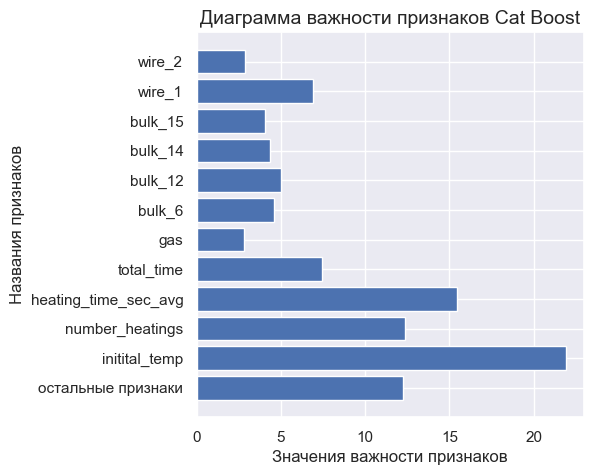

По модели градиентного бустинга CATBOOST можно выделить основные фичи, влияющие на результат: 
1. начальная температура `initital_temp`, 
2. среднее значение времени нагрева `heating_time_sec_avg`, 
3. количество нагреваний `number_heatings`, 
4. Проволочный материал `wire_1` (который чаще всего добавлялся),
5. общее время обработки (с начала первого нагрева до конца последнего) `total_time`,
6. значение объема поданного газа `gas`,

- а также в некоторой степени повлияли значения некоторых сыпучих материалов: `bulk_12`, `bulk_15`, `bulk_14`, `bulk_6`

Были проверены так же признаки и их влияние на результат в других моделях. Порядок влияния признаков отличается, но в целом основные признаки во всех моделях одни и те же.

Основные 4 признака: начальная температура, среднее значение времени нагрева, количество нагреваний, общее время обработки.

Анализ влияния признаков на предсказания так же был проведен с помощью библиотеки `shap`. В ней можно посмотреть влияние признаков на каждый конкретный объект, оценив какие признаки влияют на результат и насколько. 

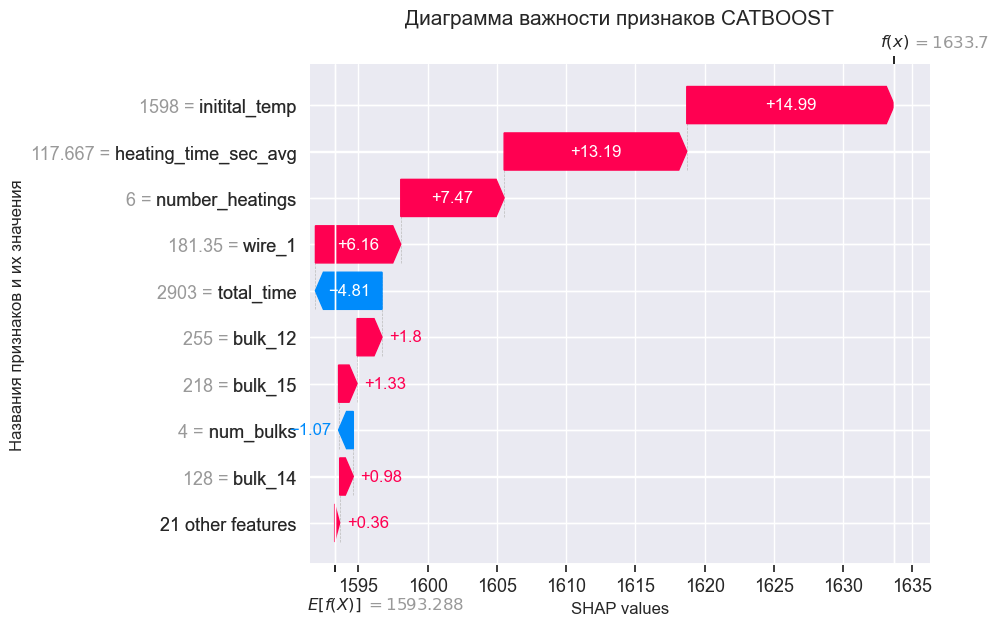

По результатам предсказаний был построен график сравнения реальных значений температуры стали в партии и предсказанных, по которому видно, что лучше всего модель предсказывает средние значения и небольшие выбросы, но с некоторомы случаными большими выбросами (от 10 градусов и более) модель справляется уже хуже.

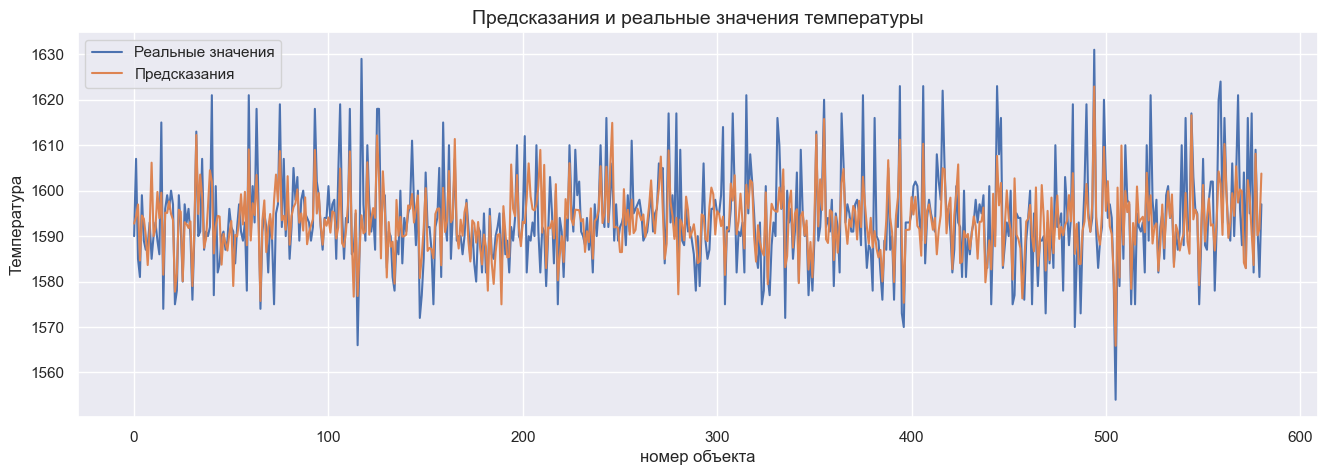

### Заключение


    
- _Какие трудности возникли и как вы их преодолели?_

    Сложно было понять процесс работы и цель исследования. Помогло общение с тимлидом и тщательный разбор рабочего процесса на примере нескольких партий с построением графиков по времени, когда какие действия производились.
    
    
- _Какие ключевые шаги в решении задачи вы выделили?_

    Ключевой шаг в решении задачи - понимание задачи и процесса обработки стали. 
    
    Так же считаю важным шагом обработка имеющихся данных и подготовка новых признаков, таких как время нагревания в партии, общее время партии, начальная температура. Как показал дальнейший анализ полученных результатов, именно эти признаки сыграли наибольшую роль в эффективности модели.
    

